# To make the same output tables as the validation 

Katherine Shaw
August 12


In [3]:
# SPDX-FileCopyrightText: Contributors to PyPSA-Eur <https://github.com/pypsa/pypsa-eur>
#
# SPDX-License-Identifier: MIT

import logging
import pandas as pd
from entsoe import EntsoePandasClient
from entsoe.exceptions import NoMatchingDataError


carrier_grouper = {
    "Waste": "Biomass",
    "Hydro Pumped Storage": "Hydro",
    "Hydro Water Reservoir": "Hydro",
    "Hydro Run-of-river and poundage": "Run of River",
    "Fossil Coal-derived gas": "Gas",
    "Fossil Gas": "Gas",
    "Fossil Oil": "Oil",
    "Fossil Oil shale": "Oil",
    "Fossil Brown coal/Lignite": "Lignite",
    "Fossil Peat": "Lignite",
    "Fossil Hard coal": "Coal",
    "Wind Onshore": "Onshore Wind",
    "Wind Offshore": "Offshore Wind",
    "Other renewable": "Other",
    "Marine": "Other",
}

api_key = '53f9250b-91d3-4d15-af4f-c0b8b1f155e2'
client = EntsoePandasClient(api_key=api_key)

start = pd.Timestamp("2019-01-01", tz="Europe/Brussels")
end = pd.Timestamp("2020-01-01", tz="Europe/Brussels")

countries = ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'XK']


generation = []
unavailable_countries = []

for country in countries:
    country_code = country

    try:
        gen = client.query_generation(country, start=start, end=end, nett=True)
        gen = gen.tz_localize(None).resample("1h").mean() #resampled for every hour? 
        gen = gen.loc[start.tz_localize(None) : end.tz_localize(None)]
        gen = gen.rename(columns=carrier_grouper).T.groupby(level=0).sum().T
        generation.append(gen)
    except NoMatchingDataError:
        unavailable_countries.append(country)

if unavailable_countries:
    print(
        f"Historical electricity production for countries {', '.join(unavailable_countries)} not available."
    )

keys = [c for c in countries if c not in unavailable_countries]
generation = pd.concat(generation, keys=keys, axis=1)
generation.to_csv('/Users/katherine.shaw/Desktop/pypsa-eur/Entsoe_electricity_production.csv')

KeyboardInterrupt: 

In [4]:
if unavailable_countries:
    print(
        f"Historical electricity production for countries {', '.join(unavailable_countries)} not available."
    )

keys = [c for c in countries if c not in unavailable_countries]
generation = pd.concat(generation, keys=keys, axis=1)


Historical electricity production for countries AL, XK not available.


In [5]:
generation

AT                                            \
                    Biomass    Coal      Gas Geothermal    Hydro  Oil   
2019-01-01 00:00:00   404.0  155.75  1282.75        0.0 -1497.00  0.0   
2019-01-01 01:00:00   404.0  155.00   945.75        0.0 -1441.00  0.0   
2019-01-01 02:00:00   404.0  155.50   618.75        0.0 -1361.50  0.0   
2019-01-01 03:00:00   404.0  155.75   575.50        0.0 -1586.50  0.0   
2019-01-01 04:00:00   404.0  154.25   449.50        0.0 -1524.00  0.0   
...                     ...     ...      ...        ...      ...  ...   
2019-12-31 20:00:00   320.0  162.00  1820.50        0.0  1006.75  0.0   
2019-12-31 21:00:00   320.0  163.25  1785.00        0.0   540.25  0.0   
2019-12-31 22:00:00   318.0  153.75  1723.00        0.0   301.00  0.0   
2019-12-31 23:00:00   317.0  144.75  1664.50        0.0   329.00  0.0   
2020-01-01 00:00:00     NaN     NaN      NaN        NaN      NaN  NaN   

                                                           ...    SK         \
                    Onshore Wind Other Run of River Solar  ...  Coal    Gas   
2019-01-01 00:00:00        248.0  22.0      2680.00   0.0  ...  59.0  182.0   
2019-01-01 01:00:00        189.0  22.0      2703.50   0.0  ...  60.0  176.0   
2019-01-01 02:00:00        142.0  22.0      2734.75   0.0  ...  61.0  180.0   
2019-01-01 03:00:00        118.0  22.0      2746.50   0.0  ...  57.0  172.0   
2019-01-01 04:00:00        165.0  22.0      2703.50   0.0  ...  58.0  173.0   
...                          ...   ...          ...   ...  ...   ...    ...   
2019-12-31 20:00:00       1800.0  22.0      2417.75   0.0  ...   0.0  220.0   
2019-12-31 21:00:00       1957.0  22.0      2376.50   0.0  ...   0.0  200.0   
2019-12-31 22:00:00       2028.0  22.0      2325.75   0.0  ...   0.0  201.0   
2019-12-31 23:00:00       1944.0  22.0      2175.00   0.0  ...   0.0  201.0   
2020-01-01 00:00:00          NaN   NaN          NaN   NaN  ...   NaN    NaN   

                                                                      \
                     Hydro Lignite Nuclear   Oil Onshore Wind  Other   
2019-01-01 00:00:00   -1.0   186.0  1928.0  44.0          0.0  278.0   
2019-01-01 01:00:00  -11.0   112.0  1928.0  44.0          0.0  292.0   
2019-01-01 02:00:00   17.0   109.0  1927.0  45.0          0.0  295.0   
2019-01-01 03:00:00  -92.0   107.0  1929.0  46.0          0.0  288.0   
2019-01-01 04:00:00 -111.0   108.0  1929.0  47.0          0.0  293.0   
...                    ...     ...     ...   ...          ...    ...   
2019-12-31 20:00:00  181.0   187.0  1940.0  49.0          1.0  223.0   
2019-12-31 21:00:00   63.0   186.0  1943.0  50.0          1.0  219.0   
2019-12-31 22:00:00    3.0   182.0  1942.0  50.0          1.0  220.0   
2019-12-31 23:00:00   11.0   178.0  1943.0  48.0          1.0  219.0   
2020-01-01 00:00:00    NaN     NaN     NaN   NaN          NaN    NaN   

                                        
                    Run of River Solar  
2019-01-01 00:00:00        295.0   0.0  
2019-01-01 01:00:00        267.0   0.0  
2019-01-01 02:00:00        279.0   0.0  
2019-01-01 03:00:00        275.0   0.0  
2019-01-01 04:00:00        266.0   0.0  
...                          ...   ...  
2019-12-31 20:00:00        532.0   1.0  
2019-12-31 21:00:00        522.0   1.0  
2019-12-31 22:00:00        461.0   1.0  
2019-12-31 23:00:00        367.0   1.0  
2020-01-01 00:00:00          NaN   NaN  

[8761 rows x 262 columns]

In [ ]:
generation.to_csv('/Users/katherine.shaw/Desktop/pypsa-eur/Entsoe_electricity_production.csv')
#hydro is sometimes negative because hydro pumped sotrage has a consumption aspect to it.

# Now can I do cross border flows? 

In [8]:
#network 
import pandas as pd
import pypsa
from entsoe import EntsoePandasClient
from entsoe.exceptions import InvalidBusinessParameterError, NoMatchingDataError
from requests import HTTPError
network_choice = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc')

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [ ]:
# SPDX-FileCopyrightText: Contributors to PyPSA-Eur <https://github.com/pypsa/pypsa-eur>
#
# SPDX-License-Identifier: MIT


import pandas as pd
import pypsa
from entsoe import EntsoePandasClient
from entsoe.exceptions import InvalidBusinessParameterError, NoMatchingDataError
from requests import HTTPError


api_key = '53f9250b-91d3-4d15-af4f-c0b8b1f155e2'
client = EntsoePandasClient(api_key=api_key)


n = network_choice
start = pd.Timestamp("2019-01-01", tz="Europe/Brussels")
end = pd.Timestamp("2020-01-01", tz="Europe/Brussels")

branches = n.branches().query("carrier in ['AC', 'DC']")
c = n.buses.country
branch_countries = pd.concat([branches.bus0.map(c), branches.bus1.map(c)], axis=1)
branch_countries = branch_countries.query("bus0 != bus1")
branch_countries = branch_countries.apply(sorted, axis=1, result_type="broadcast")
country_pairs = branch_countries.drop_duplicates().reset_index(drop=True)

flows = []
unavailable_borders = []
for from_country, to_country in country_pairs.values:
    try:
        flow_directed = client.query_crossborder_flows(
            from_country, to_country, start=start, end=end
        )
        flow_reverse = client.query_crossborder_flows(
            to_country, from_country, start=start, end=end
        )
        flow = (flow_directed - flow_reverse).rename(
            f"{from_country} - {to_country}"
        )
        flow = flow.tz_localize(None).resample("1h").mean()
        flow = flow.loc[start.tz_localize(None) : end.tz_localize(None)]
        flows.append(flow)
    except (HTTPError, NoMatchingDataError, InvalidBusinessParameterError):
        unavailable_borders.append(f"{from_country}-{to_country}")

if unavailable_borders:
    print(
        "Historical electricity cross-border flows for countries"
        f" {', '.join(unavailable_borders)} not available."
    )

flows = pd.concat(flows, axis=1)
flows.to_csv('/Users/katherine.shaw/Desktop/pypsa-eur/cross_border_flows.csv')


Historical electricity cross-border flows for countries AL-MK, AL-XK, FR-LU, HU-SI, ME-XK, MK-XK, RS-XK, GB-NO, DK-GB, DE-NO, BE-DE, FR-IE, DE-GB not available.


In [10]:
flows.to_csv('/Users/katherine.shaw/Desktop/pypsa-eur/cross_border_flows.csv')


## Day ahead prices 

In [12]:
# SPDX-FileCopyrightText: Contributors to PyPSA-Eur <https://github.com/pypsa/pypsa-eur>
#
# SPDX-License-Identifier: MIT

import logging

import pandas as pd
from entsoe import EntsoePandasClient
from entsoe.exceptions import NoMatchingDataError

api_key = '53f9250b-91d3-4d15-af4f-c0b8b1f155e2'
client = EntsoePandasClient(api_key=api_key)


start = pd.Timestamp("2019-01-01", tz="Europe/Brussels")
end = pd.Timestamp("2020-01-01", tz="Europe/Brussels")

countries = ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'XK']


prices = []
unavailable_countries = []

for country in countries:
    country_code = country

    try:
        gen = client.query_day_ahead_prices(country, start=start, end=end)
        gen = gen.tz_localize(None).resample("1h").mean()
        gen = gen.loc[start.tz_localize(None) : end.tz_localize(None)]
        prices.append(gen)
    except NoMatchingDataError:
        unavailable_countries.append(country)

if unavailable_countries:
    print(
        f"Historical electricity prices for countries {', '.join(unavailable_countries)} not available."
    )

keys = [c for c in countries if c not in unavailable_countries]
prices = pd.concat(prices, keys=keys, axis=1)


Historical electricity prices for countries AL, BA, DE, DK, IE, IT, LU, ME, MK, NO, SE, XK not available.


In [13]:
prices.to_csv('/Users/katherine.shaw/Desktop/pypsa-eur/historical_prices.csv')


# Now making the validation plots


In [ ]:
nice_names = {
    OCGT: "Open-Cycle Gas",
    CCGT: "Combined-Cycle Gas",
    offwind-ac: "Offshore Wind (AC)",
    offwind-dc: "Offshore Wind (DC)",
    offwind-float: "Offshore Wind (Floating)",
    onwind: "Onshore Wind",
    solar: "Solar",
    PHS: "Pumped Hydro Storage",
    hydro: "Reservoir & Dam",
    battery: "Battery Storage",
    H2: "Hydrogen Storage",
    lines: "Transmission Lines",
    ror: "Run of River",
    load: "Load Shedding",
    ac: "AC",
    dc: "DC",
}

In [6]:
#Packages 
import pypsa
import matplotlib.pyplot as plt 
import cartopy 
import geopandas
import networkx
import linopy
import cartopy.crs as ccrs
import atlite 
import geopandas as gpd 
import xarray
import pandas as pd 
from datetime import datetime
import numpy as np
from pypsa.plot import add_legend_patches
import random
import plotly.graph_objects as go

## Overall view of colors matched to carriers 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



In [31]:
# SPDX-FileCopyrightText: Contributors to PyPSA-Eur <https://github.com/pypsa/pypsa-eur>
#
# SPDX-License-Identifier: MIT

import matplotlib.pyplot as plt
import pandas as pd
import pypsa
import seaborn as sns
#from _helpers import configure_logging, set_scenario_config
from pypsa.statistics import get_bus_and_carrier

sns.set_theme("paper", style="whitegrid")

carrier_groups = {
    "Offshore Wind (AC)": "Offshore Wind",
    "Offshore Wind (DC)": "Offshore Wind",
    "Open-Cycle Gas": "Gas",
    "Combined-Cycle Gas": "Gas",
    "Reservoir & Dam": "Hydro",
    "Pumped Hydro Storage": "Hydro",
}



n = network_choice
n.loads.carrier = "load"

historic = pd.read_csv(
    '/Users/katherine.shaw/Desktop/pypsa-eur/Entsoe_electricity_production.csv',
    index_col=0,
    header=[0, 1],
    parse_dates=True,
)
subset_technologies = ["Geothermal", "Nuclear", "Biomass", "Lignite", "Oil", "Coal"]
lowercase_technologies = [
    technology.lower() if technology in subset_technologies else technology
    for technology in historic.columns.levels[1]
    ]
historic.columns = historic.columns.set_levels(lowercase_technologies, level=1)

colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)
colors["Offshore Wind"] = colors["Offshore Wind (AC)"]
colors["Gas"] = colors["Combined-Cycle Gas"]
colors["Hydro"] = colors["Reservoir & Dam"]
colors["Other"] = "lightgray"

if len(historic.index) > len(n.snapshots):
    historic = historic.resample(n.snapshots.inferred_freq).mean().loc[n.snapshots]

optimized = n.statistics().Supply#( changed from #dispatch
    #groupby=get_bus_and_carrier, aggregate_time=False
#).T
optimized = optimized[["Generator", "StorageUnit"]].droplevel(0, axis=1)
optimized = optimized.rename(columns=n.buses.country, level=0)
optimized = optimized.rename(columns=carrier_groups, level=1)
optimized = optimized.T.groupby(level=[0, 1]).sum().T

data = pd.concat([historic, optimized], keys=["Historic", "Optimized"], axis=1)
data.columns.names = ["Kind", "Country", "Carrier"]
data = data.mul(n.snapshot_weightings.generators, axis=0)

# total production per carrier
fig, ax = plt.subplots(figsize=(6, 6))

df = data.groupby(level=["Kind", "Carrier"], axis=1).sum().sum().unstack().T
df = df / 1e6  # TWh
df.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.close(fig)

# highest diffs

fig, ax = plt.subplots(figsize=(6, 10))

df = data.sum() / 1e6  # TWh
df = df["Optimized"] - df["Historic"]
df = df.dropna().sort_values()
df = pd.concat([df.iloc[:5], df.iloc[-5:]])
c = colors[df.index.get_level_values(1)]
df.plot.barh(
    xlabel="Optimized Production - Historic Production [TWh]", ax=ax, color=c.values
)
ax.set_title("Strongest Deviations")
ax.grid(axis="y")
fig.savefig(snakemake.output.production_deviation_bar, bbox_inches="tight")
plt.close(fig)

# seasonal operation

fig, axes = plt.subplots(3, 1, figsize=(9, 9))

df = (
    data.groupby(level=["Kind", "Carrier"], axis=1)
    .sum()
    .resample("1W")
    .mean()
    .clip(lower=0)
)
df = df / 1e3

order = (
    (df["Historic"].diff().abs().sum() / df["Historic"].sum()).sort_values().index
)
c = colors[order]
optimized = df["Optimized"].reindex(order, axis=1, level=1)
historical = df["Historic"].reindex(order, axis=1, level=1)

kwargs = dict(color=c, legend=False, ylabel="Production [GW]", xlabel="")

optimized.plot.area(ax=axes[0], **kwargs, title="Optimized")
historical.plot.area(ax=axes[1], **kwargs, title="Historic")

diff = optimized - historical
diff.clip(lower=0).plot.area(
    ax=axes[2], **kwargs, title=r"$\Delta$ (Optimized - Historic)"
)
lim = axes[2].get_ylim()[1]
diff.clip(upper=0).plot.area(ax=axes[2], **kwargs)
axes[2].set_ylim(bottom=-lim, top=lim)

h, l = axes[0].get_legend_handles_labels()
fig.legend(
    h[::-1],
    l[::-1],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    ncol=1,
    frameon=False,
    labelspacing=1,
)
fig.savefig(snakemake.output.seasonal_operation_area, bbox_inches="tight")
plt.close(fig)

# touch file
with open(snakemake.output.plots_touch, "a"):
    pass


ValueError: No axis named 1 for object type Series

In [113]:
historic = pd.read_csv(
    '/Users/katherine.shaw/Desktop/pypsa-eur/Entsoe_electricity_production.csv',
    index_col=0,
    header=[0, 1],
    parse_dates=True,
)
subset_technologies = ["Geothermal", "Nuclear", "Biomass", "Lignite", "Oil", "Coal"]
lowercase_technologies = [
    technology.lower() if technology in subset_technologies else technology
    for technology in historic.columns.levels[1]
    ]
historic.columns = historic.columns.set_levels(lowercase_technologies, level=1)

colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)
colors["Offshore Wind"] = colors["Offshore Wind (AC)"]
colors["Gas"] = colors["Combined-Cycle Gas"]
colors["Hydro"] = colors["Reservoir & Dam"]
colors["Other"] = "lightgray"

if len(historic.index) > len(n.snapshots):
    historic = historic.resample(n.snapshots.inferred_freq).mean().loc[n.snapshots]
historic

FileNotFoundError: [Errno 2] No such file or directory: '/Users/katherine.shaw/Desktop/pypsa-eur/Entsoe_electricity_production.csv'

In [165]:
for i in historic.columns:
    print(i)

('AT', 'biomass')
('AT', 'coal')
('AT', 'Gas')
('AT', 'geothermal')
('AT', 'Hydro')
('AT', 'oil')
('AT', 'Onshore Wind')
('AT', 'Other')
('AT', 'Run of River')
('AT', 'Solar')
('BA', 'coal')
('BA', 'Hydro')
('BA', 'lignite')
('BA', 'Onshore Wind')
('BA', 'Run of River')
('BE', 'biomass')
('BE', 'coal')
('BE', 'Gas')
('BE', 'Hydro')
('BE', 'nuclear')
('BE', 'Offshore Wind')
('BE', 'oil')
('BE', 'Onshore Wind')
('BE', 'Other')
('BE', 'Run of River')
('BE', 'Solar')
('BG', 'biomass')
('BG', 'coal')
('BG', 'Gas')
('BG', 'Hydro')
('BG', 'lignite')
('BG', 'nuclear')
('BG', 'Onshore Wind')
('BG', 'Run of River')
('BG', 'Solar')
('CH', 'Hydro')
('CH', 'nuclear')
('CH', 'Onshore Wind')
('CH', 'Run of River')
('CH', 'Solar')
('CZ', 'biomass')
('CZ', 'coal')
('CZ', 'Gas')
('CZ', 'Hydro')
('CZ', 'lignite')
('CZ', 'nuclear')
('CZ', 'oil')
('CZ', 'Onshore Wind')
('CZ', 'Other')
('CZ', 'Run of River')
('CZ', 'Solar')
('DE', 'biomass')
('DE', 'coal')
('DE', 'Gas')
('DE', 'geothermal')
('DE', 'Hydro')


In [167]:
for i in optimized.columns: 
    print(i)

('AL', 'biogas')
('AL', 'hydro')
('AL', 'offwind-ac')
('AL', 'offwind-float')
('AL', 'onwind')
('AL', 'ror')
('AL', 'rural solar thermal')
('AL', 'solar')
('AL', 'solar rooftop')
('AL', 'solar-hsat')
('AL', 'unsustainable biogas')
('AL', 'urban decentral solar thermal')
('AT', 'PHS')
('AT', 'biogas')
('AT', 'gas')
('AT', 'hydro')
('AT', 'onwind')
('AT', 'ror')
('AT', 'rural solar thermal')
('AT', 'solar')
('AT', 'solar rooftop')
('AT', 'solar-hsat')
('AT', 'unsustainable biogas')
('AT', 'urban central heat vent')
('AT', 'urban central solar thermal')
('AT', 'urban decentral solar thermal')
('BA', 'PHS')
('BA', 'biogas')
('BA', 'hydro')
('BA', 'offwind-ac')
('BA', 'offwind-float')
('BA', 'onwind')
('BA', 'rural solar thermal')
('BA', 'solar')
('BA', 'solar rooftop')
('BA', 'solar-hsat')
('BA', 'unsustainable biogas')
('BA', 'urban central heat vent')
('BA', 'urban central solar thermal')
('BA', 'urban decentral solar thermal')
('BE', 'PHS')
('BE', 'biogas')
('BE', 'gas')
('BE', 'hydro')

In [ ]:
optimized = n.statistics().Supply#( changed from #dispatch
    #groupby=get_bus_and_carrier, aggregate_time=False
#).T
optimized = optimized[["Generator", "StorageUnit"]].droplevel(0, axis=1)
optimized = optimized.rename(columns=n.buses.country, level=0)
optimized = optimized.rename(columns=carrier_groups, level=1)
optimized = optimized.T.groupby(level=[0, 1]).sum().T

In [202]:
#take all the carriers in generators and storageUnit , storage units are just hydro and PHS (should I not also include batteries and such?)
#or is this just primary energy, aka hydro?
#merging generation and storage units 

#Needing to recreate the optimized dataset because the arrangement on the validation originally was built with the dispatch method 
#this should recreate a dataset of an identical format to the hisotrical dataset, therefore allowing for plots and comparisons
optimized_gen = n.generators_t.p.copy() 
optimized_gen = optimized_gen.T
optimized_gen['carrier'] = optimized_gen.index.map(n.generators.carrier)
optimized_gen = optimized_gen.T

optimized_storage_unit = n.storage_units_t.p.copy()
optimized_storage_unit = optimized_storage_unit.T
optimized_storage_unit['carrier'] = optimized_storage_unit.index.map(n.storage_units.carrier)
optimized_storage_unit = optimized_storage_unit.T

optimized = pd.merge(optimized_gen, optimized_storage_unit, how= 'outer', left_index=True, right_index=True)
optimized = optimized.T
optimized['country'] = optimized.index.astype(str).str[:2]
optimized

optimized = optimized.groupby([optimized['country'], optimized['carrier']]).sum()
optimized

snapshot                              2019-01-01 00:00:00 2019-01-01 06:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                    0.001306            0.001181   
        offwind-ac                               0.000166             0.00012   
        offwind-float                            0.000201            0.000159   
        onwind                                   0.000076            0.000057   
...                                                   ...                 ...   
XK      solar-hsat                                    0.0            0.001007   
        unsustainable biogas                          0.0                 0.0   
        urban central heat vent                 -0.000327           -0.000313   
        urban central solar thermal                   0.0            0.000101   
        urban decentral solar thermal                 0.0            0.000138   

snapshot                              2019-01-01 12:00:00 2019-01-01 18:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                    0.005609            0.005678   
        offwind-ac                               0.000088            0.000022   
        offwind-float                            0.000108            0.000032   
        onwind                                   0.000028            0.000004   
...                                                   ...                 ...   
XK      solar-hsat                               0.000712                 0.0   
        unsustainable biogas                          0.0                 0.0   
        urban central heat vent                 -0.000317           -0.000318   
        urban central solar thermal              0.000042                 0.0   
        urban decentral solar thermal            0.000056                 0.0   

snapshot                              2019-01-02 00:00:00 2019-01-02 06:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                     0.00565            0.012437   
        offwind-ac                                    0.0                 0.0   
        offwind-float                            0.000002                 0.0   
        onwind                                        0.0                 0.0   
...                                                   ...                 ...   
XK      solar-hsat                                    0.0            0.001964   
        unsustainable biogas                          0.0                 0.0   
        urban central heat vent                 -0.000312            -0.00028   
        urban central solar thermal                   0.0            0.000139   
        urban decentral solar thermal                 0.0            0.000199   

snapshot                              2019-01-02 12:00:00 2019-01-02 18:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                  297.851632           18.146697   
        offwind-ac                                0.00003            0.000098   
        offwind-float                            0.000054            0.000169   
        onwind                                   0.000009            0.000033   
...                                                   ...                 ...   
XK      solar-hsat                               0.000399                 0.0   
        unsustainable biogas                          0.0                 0.0   
        urban central heat v

# Chase down missing data or clean optimized dataset 

In [207]:
# Step 1: Replace second-level index values using carrier_groups
df = optimized.copy()

carrier_groups = {
    'offwind-ac': "Offshore Wind",
    'offwind-dc': "Offshore Wind",
    'offwind-float': 'Offshore Wind',
    "Open-Cycle Gas": "Gas",
    "Combined-Cycle Gas": "Gas",
    "Reservoir & Dam": "Hydro",
    "PHS": "Hydro",
    'onwind': "Onshore Wind",
    'ror': 'run of river',
    'solar rooftop': 'solar',
    'solar-hsat': 'solar',
    'solid biomass': 'biomass',
    'unsustainable solid biomass': 'biomass'
}


new_index = [
    (lvl0, carrier_groups.get(lvl1, lvl1))
    for lvl0, lvl1 in df.index
]

# Step 2: Assign new MultiIndex
df.index = pd.MultiIndex.from_tuples(new_index)

# Step 3: Group by the new MultiIndex and sum duplicates
df = df.groupby(level=[0, 1]).sum()
df = df.T
df

AL                                   \
                    Offshore Wind Onshore Wind biogas        hydro   
snapshot                                                             
2019-01-01 00:00:00      0.000366     0.000076    0.0     0.001306   
2019-01-01 06:00:00      0.000279     0.000057    0.0     0.001181   
2019-01-01 12:00:00      0.000196     0.000028    0.0     0.005609   
2019-01-01 18:00:00      0.000055     0.000004    0.0     0.005678   
2019-01-02 00:00:00      0.000002          0.0    0.0      0.00565   
...                           ...          ...    ...          ...   
2019-12-30 18:00:00      0.000216     0.000043    0.0   357.551835   
2019-12-31 00:00:00       0.00015     0.000028    0.0     0.009251   
2019-12-31 06:00:00      0.000046     0.000007    0.0   307.605025   
2019-12-31 12:00:00      0.000031          0.0    0.0  1535.366752   
2019-12-31 18:00:00      0.000025          0.0    0.0     0.609519   

                                                                  \
                    run of river rural solar thermal       solar   
snapshot                                                           
2019-01-01 00:00:00     2.915762                 0.0         0.0   
2019-01-01 06:00:00     2.878641            0.001138  101.392503   
2019-01-01 12:00:00     2.942202              0.0004   48.872608   
2019-01-01 18:00:00     2.907254                 0.0         0.0   
2019-01-02 00:00:00     2.886721                 0.0         0.0   
...                          ...                 ...         ...   
2019-12-30 18:00:00    16.800888                 0.0         0.0   
2019-12-31 00:00:00    16.224279                 0.0         0.0   
2019-12-31 06:00:00    15.862291            0.001612   120.70789   
2019-12-31 12:00:00    15.675768            0.000435   49.270832   
2019-12-31 18:00:00    15.573429                 0.0         0.0   

                                                                        \
                    unsustainable biogas urban decentral solar thermal   
snapshot                                                                 
2019-01-01 00:00:00                  0.0                           0.0   
2019-01-01 06:00:00                  0.0                      0.003128   
2019-01-01 12:00:00                  0.0                      0.001173   
2019-01-01 18:00:00                  0.0                           0.0   
2019-01-02 00:00:00                  0.0                           0.0   
...                                  ...                           ...   
2019-12-30 18:00:00                  0.0                           0.0   
2019-12-31 00:00:00                  0.0                           0.0   
2019-12-31 06:00:00                  0.0                      0.004287   
2019-12-31 12:00:00                  0.0                      0.001267   
2019-12-31 18:00:00                  0.0                           0.0   

                            AT  ...           XK                    \
                         Hydro  ... Onshore Wind biogas      hydro   
snapshot                        ...                                  
2019-01-01 00:00:00   -0.00109  ...     6.736639    0.0   0.000628   
2019-01-01 06:00:00 -45.728273  ...     9.687179    0.0   0.000651   
2019-01-01 12:00:00  -0.007033  ...     3.798451    0.0   0.003515   
2019-01-01 18:00:00  -0.013844  ...          0.0    0.0   0.003337   
2019-01-02 00:00:00  -0.004054  ...          0.0    0.0   0.003434   
...                        ...  ...          ...    ...        ...   
2019-12-30 18:00:00   0.002165  ...     4.327337    0.0   5.826577   
2019-12-31 00:00:00    0.00088  ...          0.0    0.0   0.004721   
2019-12-31 06:00:00  -0.000364  ...          0.0    0.0   5.444342   
2019-12-31 12:00:00   0.159409  ...          0.0    0.0  23.629256   
2019-12-31 18:00:00   0.148587  ...     1.960733    0.0   0.469813   

                                                                \
             

In [224]:
df

Kind                             historic     optimized
Carrier                                                
biogas                                NaN  5.669180e-07
biomass                        111.557511  1.206563e+03
coal                           204.069677  1.101671e+03
gas                            578.336004  3.134524e+03
geothermal                       5.943592  8.584786e-01
hydro                          274.957947  2.958859e+02
lignite                        259.666155  1.589982e+03
nuclear                        808.252947  8.041828e+02
offshore wind                   58.211425  1.514361e+02
oil                             17.424761           NaN
oil primary                           NaN  5.760052e+03
onshore wind                   342.019524  4.862975e+02
other                           82.999572           NaN
run of river                   194.233467  1.543795e+02
rural solar thermal                   NaN  4.646351e-05
solar                          114.169780  4.760263e+02
unsustainable biogas                  NaN  1.978366e+02
unsustainable bioliquids              NaN  1.921633e+02
urban central heat vent               NaN -2.522485e-01
urban central solar thermal           NaN  4.050161e-05
urban decentral solar thermal         NaN  5.697730e-05

Evaluating differnces in the dataframe indicies -- (PHS downward added in the above dictionary compared to the original validation script)

In [199]:
optimized_index_values = df.columns.get_level_values(1)
historic_index_values = historic.columns.get_level_values(1)

# Normalize both sets to lowercase
optimized_index_values = set(val.lower() for val in optimized_index_values)
historic_index_values = set(val.lower() for val in historic_index_values)


set(optimized_index_values) - set(historic_index_values) #just going to ignore these


{'biogas',
 'oil primary',
 'rural solar thermal',
 'unsustainable biogas',
 'unsustainable bioliquids',
 'urban central heat vent',
 'urban central solar thermal',
 'urban decentral solar thermal'}

#how does solid biomass in entso-e compare to solid biomass/unsustaiable solid biomass in the model? 

There's only one column for biomass in Entsoe-E : so all of our biomass should go into there? 
Then there's the question of what counts as sustainable biomass versus unsustainable biomass in the model

#the older versions of validation don't include biomass because it's considered a sector network, but I believe it would be worthwhile to include it here


In [364]:
# SPDX-FileCopyrightText: Contributors to PyPSA-Eur <https://github.com/pypsa/pypsa-eur>
#
# SPDX-License-Identifier: MIT

import matplotlib.pyplot as plt
import pandas as pd
import pypsa
import seaborn as sns
#from _helpers import configure_logging, set_scenario_config
from pypsa.statistics import get_bus_and_carrier

sns.set_theme("paper", style="whitegrid")

carrier_groups = {
    'offwind-ac': "Offshore Wind",
    'offwind-dc': "Offshore Wind",
    'offwind-float': 'Offshore Wind',
    "Open-Cycle Gas": "Gas",
    "Combined-Cycle Gas": "Gas",
    "Reservoir & Dam": "Hydro",
    "PHS": "Hydro",
    'onwind': "Onshore Wind",
    'ror': 'run of river',
    #'solar rooftop': 'solar',
    #'solar-hsat': 'solar',
    'solid biomass': 'biomass',
    'unsustainable solid biomass': 'biomass'
}



n = network_choice
n.loads.carrier = "load"

historic = pd.read_csv(
    '/Users/katherine.shaw/Desktop/pypsa-eur/2020 entsoe-e/Entsoe_electricity_production.csv',
    index_col=0,
    header=[0, 1],
    parse_dates=True,
)
subset_technologies = ["Geothermal", "Nuclear", "Biomass", "Lignite", "Oil", "Coal"]
lowercase_technologies = [
    technology.lower() if technology in subset_technologies else technology
    for technology in historic.columns.levels[1]
    ]
historic.columns = historic.columns.set_levels(lowercase_technologies, level=1)

colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)
colors["Offshore Wind"] = colors["Offshore Wind (AC)"]
colors["Gas"] = colors["Combined-Cycle Gas"]
colors["Hydro"] = colors["Reservoir & Dam"]
colors["Other"] = "lightgray"

if len(historic.index) > len(n.snapshots):
    historic = historic.resample(n.snapshots.inferred_freq).mean().loc[n.snapshots]

############
#Needing to recreate the optimized dataset because the arrangement on the validation originally was built with the dispatch method 
#this should recreate a dataset of an identical format to the hisotrical dataset, therefore allowing for plots and comparisons
optimized_gen = n.generators_t.p.copy() 
optimized_gen = optimized_gen.T
optimized_gen['carrier'] = optimized_gen.index.map(n.generators.carrier)
optimized_gen = optimized_gen.T

optimized_storage_unit = n.storage_units_t.p.copy()
optimized_storage_unit = optimized_storage_unit.T
optimized_storage_unit['carrier'] = optimized_storage_unit.index.map(n.storage_units.carrier)
optimized_storage_unit = optimized_storage_unit.T

optimized = pd.merge(optimized_gen, optimized_storage_unit, how= 'outer', left_index=True, right_index=True)
optimized = optimized.T
optimized['country'] = optimized.index.astype(str).str[:2]
optimized

optimized = optimized.groupby([optimized['country'], optimized['carrier']]).sum()
optimized

df = optimized.copy() #still in MW, not MWh
df = df * n.snapshot_weightings.generators[0]

new_index = [
    (lvl0, carrier_groups.get(lvl1, lvl1))
    for lvl0, lvl1 in df.index
]

# Step 2: Assign new MultiIndex
df.index = pd.MultiIndex.from_tuples(new_index)

# Step 3: Group by the new MultiIndex and sum duplicates
df = df.groupby(level=[0, 1]).sum()
df = df.T
df

#############
data = pd.concat([historic, df], keys=["Historic", "Optimized"], axis=1)
# Convert all levels of MultiIndex column names to lowercase
data.columns = pd.MultiIndex.from_tuples(
    [(str(level1).lower(), str(level2).lower(), str(level3).lower()) for level1, level2, level3 in data.columns]
)
data.columns.names = ["Kind", "Country", "Carrier"]
data = data.mul(n.snapshot_weightings.generators, axis=0)
data

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_35628/1803902457.py:81: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Kind                historic                                             \
Country                   at                                              
Carrier              biomass    coal       gas geothermal    hydro  oil   
snapshot                                                                  
2019-01-01 00:00:00   2424.0  931.50   4304.00        0.0 -9064.50  0.0   
2019-01-01 06:00:00   2420.0  931.50   2738.25        0.0 -9269.25  0.0   
2019-01-01 12:00:00   2424.0  928.75   3305.00        0.0 -8481.50  0.0   
2019-01-01 18:00:00   2424.0  919.00   3367.00        0.0 -8240.75  0.0   
2019-01-02 00:00:00   2420.0  918.50   2825.00        0.0 -9514.50  0.0   
...                      ...     ...       ...        ...      ...  ...   
2019-12-30 18:00:00   1886.0  974.00  11979.00        0.0  1309.75  0.0   
2019-12-31 00:00:00   1910.0  967.00   7900.50        0.0 -8415.25  0.0   
2019-12-31 06:00:00   1896.0  966.25  10832.00        0.0  1549.25  0.0   
2019-12-31 12:00:00   1899.0  973.50  10898.50        0.0  6848.75  0.0   
2019-12-31 18:00:00   1915.0  948.25  10620.75        0.0  6840.75  0.0   

Kind                                                         ...   optimized  \
Country                                                      ...          xk   
Carrier             onshore wind  other run of river  solar  ...       hydro   
snapshot                                                     ...               
2019-01-01 00:00:00       1148.0  132.0     16255.75    0.0  ...    0.022598   
2019-01-01 06:00:00       4234.0  132.0     17406.75  176.0  ...    0.023433   
2019-01-01 12:00:00      11058.0  132.0     17237.75  256.0  ...     0.12653   
2019-01-01 18:00:00      15207.0  132.0     16047.00    4.0  ...    0.120132   
2019-01-02 00:00:00      15600.0  132.0     12989.00    0.0  ...    0.123634   
...                          ...    ...          ...    ...  ...         ...   
2019-12-30 18:00:00       2043.0  132.0     14756.75    4.0  ...  209.756759   
2019-12-31 00:00:00       2037.0  132.0     12983.25    0.0  ...    0.169958   
2019-12-31 06:00:00       3227.0  132.0     13971.00  302.0  ...  195.996304   
2019-12-31 12:00:00      10419.0  132.0     14167.75  384.0  ...  850.653214   
2019-12-31 18:00:00      11816.0  132.0     14353.00    4.0  ...    16.91327   

Kind                                                                          \
Country                                                                        
Carrier             run of river rural solar thermal     solar solar rooftop   
snapshot                                                                       
2019-01-01 00:00:00    83.583353                 0.0       0.0           0.0   
2019-01-01 06:00:00    86.801685             0.00359   0.00689       0.05159   
2019-01-01 12:00:00    88.406621            0.001487  0.003992      0.031479   
2019-01-01 18:00:00    87.088152                 0.0       0.0           0.0   
2019-01-02 00:00:00    86.423405                 0.0       0.0           0.0   
...                          ...                 ...       ...           ...   
2019-12-30 18:00:00   223.079833                 0.0       0.0           0.0   
2019-12-31 00:00:00   194.059436                 0.0       0.0           0.0   
2019-12-31 06:00:00   174.815624              0.0152  0.016467      0.111662   
2019-12-31 12:00:00   165.503426            0.002995    0.0046      0.035666   
2019-12-31 18:00:00   163.130772                 0.0       0.0           0.0   

Kind                                                                         \
Country                                                                       
Carrier             solar-hsat unsustainable biogas urban central heat vent   
snapshot                                                                      
2019-01-01 00:00:00        0.0                  0.0               -0.011758   
2019-01-01 06:00:00   0.036235                  0.0               -0.011252  

In [365]:
#getting rid of sector columns 
#uuugh I can't use these things that are sector oriented since they MIGHT BE CONTRIBUTING TO HEAT
# List of substrings to check in the third-level column headers
exclude_substrings = [
    'biogas',
    'oil primary',
    'rural solar thermal',
    'unsustainable biogas',
    'unsustainable bioliquids',
    'urban central heat vent',
    'urban central solar thermal',
    'urban decentral solar thermal',
]

# Filter columns where the 3rd level (index 2) does NOT contain any of the substrings
filtered_columns = [
    col for col in data.columns
    if not any(substring in col[2].lower() for substring in exclude_substrings)
]

# Apply the filter to the DataFrame
data_filtered = data[filtered_columns]
data_filtered

Kind                historic                                             \
Country                   at                                              
Carrier              biomass    coal       gas geothermal    hydro  oil   
snapshot                                                                  
2019-01-01 00:00:00   2424.0  931.50   4304.00        0.0 -9064.50  0.0   
2019-01-01 06:00:00   2420.0  931.50   2738.25        0.0 -9269.25  0.0   
2019-01-01 12:00:00   2424.0  928.75   3305.00        0.0 -8481.50  0.0   
2019-01-01 18:00:00   2424.0  919.00   3367.00        0.0 -8240.75  0.0   
2019-01-02 00:00:00   2420.0  918.50   2825.00        0.0 -9514.50  0.0   
...                      ...     ...       ...        ...      ...  ...   
2019-12-30 18:00:00   1886.0  974.00  11979.00        0.0  1309.75  0.0   
2019-12-31 00:00:00   1910.0  967.00   7900.50        0.0 -8415.25  0.0   
2019-12-31 06:00:00   1896.0  966.25  10832.00        0.0  1549.25  0.0   
2019-12-31 12:00:00   1899.0  973.50  10898.50        0.0  6848.75  0.0   
2019-12-31 18:00:00   1915.0  948.25  10620.75        0.0  6840.75  0.0   

Kind                                                         ...  \
Country                                                      ...   
Carrier             onshore wind  other run of river  solar  ...   
snapshot                                                     ...   
2019-01-01 00:00:00       1148.0  132.0     16255.75    0.0  ...   
2019-01-01 06:00:00       4234.0  132.0     17406.75  176.0  ...   
2019-01-01 12:00:00      11058.0  132.0     17237.75  256.0  ...   
2019-01-01 18:00:00      15207.0  132.0     16047.00    4.0  ...   
2019-01-02 00:00:00      15600.0  132.0     12989.00    0.0  ...   
...                          ...    ...          ...    ...  ...   
2019-12-30 18:00:00       2043.0  132.0     14756.75    4.0  ...   
2019-12-31 00:00:00       2037.0  132.0     12983.25    0.0  ...   
2019-12-31 06:00:00       3227.0  132.0     13971.00  302.0  ...   
2019-12-31 12:00:00      10419.0  132.0     14167.75  384.0  ...   
2019-12-31 18:00:00      11816.0  132.0     14353.00    4.0  ...   

Kind                    optimized                                        \
Country                        sk                                         
Carrier              run of river        solar solar rooftop solar-hsat   
snapshot                                                                  
2019-01-01 00:00:00   4618.163725          0.0           0.0        0.0   
2019-01-01 06:00:00   4648.906597  2768.441602      0.006623   0.008043   
2019-01-01 12:00:00   4929.031924   518.646682      0.000837   0.001043   
2019-01-01 18:00:00   6571.580391          0.0           0.0        0.0   
2019-01-02 00:00:00   6813.566093          0.0           0.0        0.0   
...                           ...          ...           ...        ...   
2019-12-30 18:00:00  11748.953619          0.0           0.0        0.0   
2019-12-31 00:00:00  10479.723677          0.0           0.0        0.0   
2019-12-31 06:00:00   9630.229639  7304.863364      0.020491   0.026742   
2019-12-31 12:00:00   9305.336877  1661.832818      0.003574   0.004504   
2019-12-31 18:00:00   9284.750299          0.0           0.0        0.0   

Kind                                                                 \
Country                       xk                                      
Carrier             onshore wind       hydro run of river     solar   
snapshot                                                              
2019-01-01 00:00:00   242.519013    0.022598    83.583353       0.0   
2019-01-01 06:00:00   348.738441    0.023433    86.801685   0.00689   
2019-01-01 12:00:00   136.744224     0.12653    88.406621  0.003992   
2019-01-01 18:00:00          0.0    0.120132    87.088152       0.0   
2019-01-02 00:00:00          0.0    0.123634    86.423405       0.0   
...                          ...         ...          ...       ...   
2019-12-30 18:00:

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_35628/3121388686.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



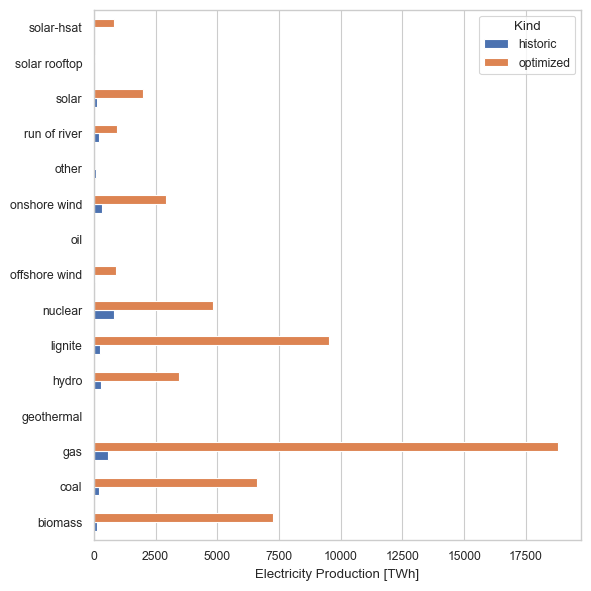

In [ ]:
# total production per carrier
fig, ax = plt.subplots(figsize=(6, 6))

df = data_filtered.groupby(level=["Kind", "Carrier"], axis=1).sum().sum().unstack().T
df = df / 1e6  # TWh
df.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()
#what?

In [ ]:
#gas needs to be the gas coming out of combined cycle gas turbines and OCGT, not anything having to do with cars or heat 
#solar needs to just be solar that coming on to the grid at the entoso-e level, thus probably not solar rooftop
#coal and gas prices need to be adjusted? 


#trying to make optimized dataset that will show only the amount 


Kind                historic                                             \
Country                   at                                              
Carrier              biomass    coal       gas geothermal    hydro  oil   
snapshot                                                                  
2019-01-01 00:00:00   2424.0  931.50   4304.00        0.0 -9064.50  0.0   
2019-01-01 06:00:00   2420.0  931.50   2738.25        0.0 -9269.25  0.0   
2019-01-01 12:00:00   2424.0  928.75   3305.00        0.0 -8481.50  0.0   
2019-01-01 18:00:00   2424.0  919.00   3367.00        0.0 -8240.75  0.0   
2019-01-02 00:00:00   2420.0  918.50   2825.00        0.0 -9514.50  0.0   
...                      ...     ...       ...        ...      ...  ...   
2019-12-30 18:00:00   1886.0  974.00  11979.00        0.0  1309.75  0.0   
2019-12-31 00:00:00   1910.0  967.00   7900.50        0.0 -8415.25  0.0   
2019-12-31 06:00:00   1896.0  966.25  10832.00        0.0  1549.25  0.0   
2019-12-31 12:00:00   1899.0  973.50  10898.50        0.0  6848.75  0.0   
2019-12-31 18:00:00   1915.0  948.25  10620.75        0.0  6840.75  0.0   

Kind                                                         ...    optimized  \
Country                                                      ...           sk   
Carrier             onshore wind  other run of river  solar  ... run of river   
snapshot                                                     ...                
2019-01-01 00:00:00       1148.0  132.0     16255.75    0.0  ...   769.693954   
2019-01-01 06:00:00       4234.0  132.0     17406.75  176.0  ...   774.817766   
2019-01-01 12:00:00      11058.0  132.0     17237.75  256.0  ...   821.505321   
2019-01-01 18:00:00      15207.0  132.0     16047.00    4.0  ...  1095.263399   
2019-01-02 00:00:00      15600.0  132.0     12989.00    0.0  ...  1135.594349   
...                          ...    ...          ...    ...  ...          ...   
2019-12-30 18:00:00       2043.0  132.0     14756.75    4.0  ...  1958.158937   
2019-12-31 00:00:00       2037.0  132.0     12983.25    0.0  ...  1746.620613   
2019-12-31 06:00:00       3227.0  132.0     13971.00  302.0  ...  1605.038273   
2019-12-31 12:00:00      10419.0  132.0     14167.75  384.0  ...   1550.88948   
2019-12-31 18:00:00      11816.0  132.0     14353.00    4.0  ...  1547.458383   

Kind                                                                    \
Country                                                             xk   
Carrier                    solar solar rooftop solar-hsat onshore wind   
snapshot                                                                 
2019-01-01 00:00:00          0.0           0.0        0.0    40.419835   
2019-01-01 06:00:00   461.406934      0.001104   0.001341    58.123074   
2019-01-01 12:00:00    86.441114      0.000139   0.000174    22.790704   
2019-01-01 18:00:00          0.0           0.0        0.0          0.0   
2019-01-02 00:00:00          0.0           0.0        0.0          0.0   
...                          ...           ...        ...          ...   
2019-12-30 18:00:00          0.0           0.0        0.0    25.964023   
2019-12-31 00:00:00          0.0           0.0        0.0          0.0   
2019-12-31 06:00:00  1217.477227      0.003415   0.004457          0.0   
2019-12-31 12:00:00   276.972136      0.000596   0.000751          0.0   
2019-12-31 18:00:00          0.0           0.0        0.0      11.7644   

Kind                                                                  \
Country                                                                
Carrier                   hydro run of river     solar solar rooftop   
snapshot                                                               
2019-01-01 00:00:00    0.003766    13.930559       0.0           0.0   
2019-01-01 06:00:00    0.003906    14.466948  0.001148      0.008598   
2019-01-01 12:00:00    0.021088    14.734437  0.000665      0.005246   
2019-01-01 18:00:00    0.020022    14.51469

In [ ]:
electric_network = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/resources/networks/base_s_39_elec_.nc')
electric_network.statistics() #this is before the electric network has been solved, just the tee up for the electric network 


INFO:pypsa.io:Imported network base_s_39_elec_.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas                 0.0        209394.21950   
            Open-Cycle Gas                     0.0            23.31000   
            Run of River                       0.0         48341.66702   
            biomass                            0.0         12011.46098   
            coal                               0.0         92974.86606   
            geothermal                         0.0            98.00000   
            lignite                            0.0         60675.92720   
            nuclear                            0.0        127614.10000   
            oil                                0.0          6025.02171   
Line        AC                                 0.0        336503.67241   
Link        DC                                 0.0         27020.00000   
StorageUnit Pumped Hydro Storage               0.0         55810.13555   
            Reservoir & Dam                    0.0        104378.09356   

                                  Supply  Withdrawal  Energy Balance  \
Generator   Combined-Cycle Gas       0.0         0.0             0.0   
            Open-Cycle Gas           0.0         0.0             0.0   
            Run of River             0.0         0.0             0.0   
            biomass                  0.0         0.0             0.0   
            coal                     0.0         0.0             0.0   
            geothermal               0.0         0.0             0.0   
            lignite                  0.0         0.0             0.0   
            nuclear                  0.0         0.0             0.0   
            oil                      0.0         0.0             0.0   
Line        AC                       0.0         0.0             0.0   
Link        DC                       0.0         0.0             0.0   
StorageUnit Pumped Hydro Storage     0.0         0.0             0.0   
            Reservoir & Dam          0.0         0.0             0.0   

                                  Transmission  Capacity Factor  Curtailment  \
Generator   Combined-Cycle Gas             0.0              0.0          0.0   
            Open-Cycle Gas                 0.0              0.0          0.0   
            Run of River                   0.0              0.0          0.0   
            biomass                        0.0              0.0          0.0   
            coal                           0.0              0.0          0.0   
            geothermal                     0.0              0.0          0.0   
            lignite                        0.0              0.0          0.0   
            nuclear                        0.0              0.0          0.0   
            oil                            0.0              0.0          0.0   
Line        AC                             0.0              0.0          0.0   
Link        DC                             0.0              0.0          0.0   
StorageUnit Pumped Hydro Storage           0.0              0.0          0.0   
            Reservoir & Dam                0.0              0.0          0.0   

                                  Capital Expenditure  \
Generator   Combined-Cycle Gas                    0.0   
            Open-Cycle Gas                        0.0   
            Run of River                          0.0   
            biomass                               0.0   
            coal                                  0.0   
            geothermal                            0.0   
            lignite                               0.0   
            nuclear                               0.0   
            oil                                   0.0   
Line        AC                                    0.0   
Link        DC                                    0.0   
StorageUnit Pumped Hydro Storage                  0.0   
            Reservoir & Dam                       0.0   

                                  Operational Expenditure  Revenue  

In [ ]:
electric_network = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/resources/networks/base_s_39_elec.nc')
electric_network.statistics() #this one is also before anything is solved

INFO:pypsa.io:Imported network base_s_39_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas                 0.0        209394.21950   
            Open-Cycle Gas                     0.0            23.31000   
            Run of River                       0.0         48341.66702   
            biomass                            0.0         12011.46098   
            coal                               0.0         92974.86606   
            geothermal                         0.0            98.00000   
            lignite                            0.0         60675.92720   
            nuclear                            0.0        127614.10000   
            oil                                0.0          6025.02171   
Line        AC                                 0.0        336503.67241   
Link        DC                                 0.0         27020.00000   
StorageUnit Pumped Hydro Storage               0.0         55810.13555   
            Reservoir & Dam                    0.0        104378.09356   

                                  Supply  Withdrawal  Energy Balance  \
Generator   Combined-Cycle Gas       0.0         0.0             0.0   
            Open-Cycle Gas           0.0         0.0             0.0   
            Run of River             0.0         0.0             0.0   
            biomass                  0.0         0.0             0.0   
            coal                     0.0         0.0             0.0   
            geothermal               0.0         0.0             0.0   
            lignite                  0.0         0.0             0.0   
            nuclear                  0.0         0.0             0.0   
            oil                      0.0         0.0             0.0   
Line        AC                       0.0         0.0             0.0   
Link        DC                       0.0         0.0             0.0   
StorageUnit Pumped Hydro Storage     0.0         0.0             0.0   
            Reservoir & Dam          0.0         0.0             0.0   

                                  Transmission  Capacity Factor  Curtailment  \
Generator   Combined-Cycle Gas             0.0              0.0          0.0   
            Open-Cycle Gas                 0.0              0.0          0.0   
            Run of River                   0.0              0.0          0.0   
            biomass                        0.0              0.0          0.0   
            coal                           0.0              0.0          0.0   
            geothermal                     0.0              0.0          0.0   
            lignite                        0.0              0.0          0.0   
            nuclear                        0.0              0.0          0.0   
            oil                            0.0              0.0          0.0   
Line        AC                             0.0              0.0          0.0   
Link        DC                             0.0              0.0          0.0   
StorageUnit Pumped Hydro Storage           0.0              0.0          0.0   
            Reservoir & Dam                0.0              0.0          0.0   

                                  Capital Expenditure  \
Generator   Combined-Cycle Gas                    0.0   
            Open-Cycle Gas                        0.0   
            Run of River                          0.0   
            biomass                               0.0   
            coal                                  0.0   
            geothermal                            0.0   
            lignite                               0.0   
            nuclear                               0.0   
            oil                                   0.0   
Line        AC                                    0.0   
Link        DC                                    0.0   
StorageUnit Pumped Hydro Storage                  0.0   
            Reservoir & Dam                       0.0   

                                  Operational Expenditure  Revenue  

In [307]:
electric_network = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc')
electric_network.statistics()

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Optimal Capacity  \
Generator Offshore Wind (AC)                            32366.66918   
          Offshore Wind (DC)                                0.02100   
          Offshore Wind (Floating)                          0.02072   
          Onshore Wind                                 229187.82915   
          Run of River                                  48341.66702   
...                                                             ...   
Store     oil                                              31.64092   
          residential rural water tanks                     0.27103   
          residential urban decentral water tanks           0.26477   
          uranium                                           0.82650   
          urban central water tanks                    206154.68764   

                                                   Installed Capacity  \
Generator Offshore Wind (AC)                              32366.64900   
          Offshore Wind (DC)                                  0.00000   
          Offshore Wind (Floating)                            0.00000   
          Onshore Wind                                   222987.08000   
          Run of River                                    48341.66702   
...                                                               ...   
Store     oil                                                 0.00000   
          residential rural water tanks                       0.00000   
          residential urban decentral water tanks             0.00000   
          uranium                                             0.00000   
          urban central water tanks                           0.00000   

                                                         Supply    Withdrawal  \
Generator Offshore Wind (AC)                       1.515795e+08  0.000000e+00   
          Offshore Wind (DC)                       7.670652e+01  0.000000e+00   
          Offshore Wind (Floating)                 4.799082e+01  0.000000e+00   
          Onshore Wind                             4.861273e+08  0.000000e+00   
          Run of River                             1.543796e+08  0.000000e+00   
...                                                         ...           ...   
Store     oil                                      3.831188e+02  3.831188e+02   
          residential rural water tanks            7.037680e+00  2.191839e+01   
          residential urban decentral water tanks  7.513060e+00  2.209607e+01   
          uranium                                  4.271000e-02  4.271000e-02   
          urban central water tanks                1.454229e+07  1.462417e+07   

                                                   Energy Balance  \
Generator Offshore Wind (AC)                         1.515795e+08   
          Offshore Wind (DC)                         7.670652e+01   
          Offshore Wind (Floating)                   4.799082e+01   
          Onshore Wind                               4.861273e+08   
          Run of River                               1.543796e+08   
...                                                           ...   
Store     oil                                        0.000000e+00   
          residential rural water tanks             -1.488071e+01   
          residential urban decentral water tanks   -1.458301e+01   
          uranium                                    0.000000e+00   
          urban central water tanks                 -8.187992e+04   

                                                   Transmission  \
Generator Offshore Wind (AC)                                0.0   
          Offshore Wind (DC)                                0.0   
          Offshore Wind (Floating)                          0.0   
          Onshore Wind                                      0.0   
          Run of River                                      0.0   
...                                                         ...   
Store     oil                                     

In [308]:
electric_network.statistics().loc['Generator']

Optimal Capacity  \
Offshore Wind (AC)                             3.236667e+04   
Offshore Wind (DC)                             2.100000e-02   
Offshore Wind (Floating)                       2.072000e-02   
Onshore Wind                                   2.291878e+05   
Run of River                                   4.834167e+04   
Solar                                          2.764823e+05   
biogas                                         1.085807e+04   
coal                                           3.349272e+05   
gas                                            1.584665e+06   
geothermal                                     9.800008e+01   
lignite                                        1.838838e+05   
nuclear                                        1.276141e+05   
oil primary                                    9.650027e+05   
residential rural solar thermal                1.505500e-01   
residential urban decentral solar thermal      1.664300e-01   
solar rooftop                                  5.225807e+03   
solar-hsat                                     7.409433e+04   
solid biomass                                  1.550627e+07   
unsustainable biogas                           1.978366e+08   
unsustainable bioliquids                       1.921633e+08   
unsustainable solid biomass                    1.206563e+09   
urban central heat vent                        3.143548e+03   
urban central solar thermal                    1.150700e-01   

                                           Installed Capacity        Supply  \
Offshore Wind (AC)                               3.236665e+04  1.515795e+08   
Offshore Wind (DC)                               0.000000e+00  7.670652e+01   
Offshore Wind (Floating)                         0.000000e+00  4.799082e+01   
Onshore Wind                                     2.229871e+05  4.861273e+08   
Run of River                                     4.834167e+04  1.543796e+08   
Solar                                            2.764823e+05  3.304053e+08   
biogas                                           1.085807e+04  4.312900e-01   
coal                                             0.000000e+00  1.101636e+09   
gas                                              1.584665e+06  3.134597e+09   
geothermal                                       9.800000e+01  8.584782e+05   
lignite                                          0.000000e+00  1.589976e+09   
nuclear                                          1.276141e+05  8.041828e+08   
oil primary                                      0.000000e+00  5.760052e+09   
residential rural solar thermal                  0.000000e+00  4.847817e+01   
residential urban decentral solar thermal        0.000000e+00  5.845604e+01   
solar rooftop                                    0.000000e+00  8.315093e+06   
solar-hsat                                       0.000000e+00  1.373172e+08   
solid biomass                                    1.550627e+07  1.378883e+01   
unsustainable biogas                             1.978366e+08  1.978366e+08   
unsustainable bioliquids                         1.921633e+08  1.921633e+08   
unsustainable solid biomass                      1.206563e+09  1.206563e+09   
urban central heat vent                          0.000000e+00  0.000000e+00   
urban central solar thermal                      0.000000e+00  3.450228e+01   

                                            Withdrawal  Energy Balance  \
Offshore Wind (AC)                              0.0000    1.515795e+08   
Offshore Wind (DC)                              0.0000    7.670652e+01   
Offshore Wind (Floating)                        0.0000    4.799082e+01   
Onshore Wind                                    0.0000    4.861273e+08   
Run of River                                    0.0000    1.543796e+08   
Solar                                           0.0000    3.304053e+08   
biogas                                          0.0000    4.312900e-01   
coal                                     

In [83]:
def bus_connections(network, bus_name): 
    if bus_name in network.buses.index.values:

        connected_generators = network.generators[network.generators.bus == bus_name]
        connected_loads = network.loads[network.loads.bus == bus_name]
        connected_storage_units = network.storage_units[network.storage_units.bus == bus_name]
        connected_links_in = network.links[network.links.bus1 == bus_name]
        connected_links_out = network.links[network.links.bus0 == bus_name]
        connected_lines = network.lines[(network.lines.bus0 == bus_name) | (network.lines.bus1 == bus_name)]
        connected_transformers = network.transformers[(network.transformers.bus0 == bus_name) | (network.transformers.bus1 == bus_name)]
        connected_stores = network.stores[network.stores.bus == bus_name]
        if any(connected_generators.index.values):
            print("The generators connected to this bus are:    " + str(connected_generators.index.values))
        if any(connected_loads.index.values):
            print("The loads connected to this bus are:     " + str(connected_loads.index.values))
        if any(connected_storage_units.index.values):
            print("The storage units connected to this bus are:   " + str(connected_storage_units.index.values))
        if any(connected_stores.index.values):
            print("The stores connected to this bus are:   " + str(connected_stores.index.values))
        if any(connected_links_in.index.values):
            print("The incoming links to this bus are from the bus:  " +  str(connected_links_in.bus0.values))
        if any(connected_links_in.index.values):
            print("The incoming links are:  " +  str(connected_links_in.index))
        if any(connected_links_out.index.values):
            print("The outgoing links from this bus are to the bus:  " +  str(connected_links_out.bus1.values))
        if any(connected_lines.index.values):
            print("The lines connected to this bus are connected to:   "  + str(connected_lines.bus1.values))
        if any(connected_transformers.index.values):
            print(connected_transformers.index.values)
        return None    
    else:      
        return str("This bus does not exist in the network")
    


electric_network.generators[electric_network.generators.carrier == 'gas']

#bus_connections(electric_network, 'GB2 0 gas')
#so for gas I need to only take this dispatch though 
network = electric_network.copy()
gas_buses = network.buses[network.buses.carrier == 'gas'].index
electric_buses = network.buses[network.buses.carrier == 'AC'].index
gas_to_elec_links = network.links[network.links.bus0.isin(gas_buses)][network.links.bus1.isin(electric_buses)]
gas_to_elec_links_names = gas_to_elec_links.index
gas_to_elec_dispatch = network.links_t.p1[gas_to_elec_links_names] * -1 
gas_to_elec_energy_totals = gas_to_elec_dispatch * network.snapshot_weightings.generators[0]
gas_to_elec_energy_totals = gas_to_elec_energy_totals.sum() #combining the totals from across the year 
gas_to_elec_energy_totals = gas_to_elec_energy_totals.sum() #suming all the regions 
gas_to_elec_energy_totals = gas_to_elec_energy_totals * 1e6 #MWh to Wh 
gas_to_elec_energy_totals = gas_to_elec_energy_totals/1e12 #Wh to Twh
gas_to_elec_energy_totals

NameError: name 'electric_network' is not defined

In [310]:
(network.links_t.p1[gas_to_elec_links_names] * -6).sum().sum()

9466480.7595837

### Solely the electric network solution from solve_elec_networks

In [322]:
electric_network_exclusive_solve = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39_elec_.nc')

INFO:pypsa.io:Imported network base_s_39_elec_.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


In [329]:
electric_network_exclusive_solve.generators.carrier.unique()
gas_generators = electric_network_exclusive_solve.generators[electric_network_exclusive_solve.generators.carrier.isin(['coal'])].index 
gas_generators_dispatch = electric_network_exclusive_solve.generators_t.p[gas_generators]
gas_generators_dispatch = gas_generators_dispatch * electric_network_exclusive_solve.snapshot_weightings.generators[0] #turning into MWh 
gas_generators_dispatch = gas_generators_dispatch.sum().sum()
gas_generators_dispatch 

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_35628/4211879918.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



567812150.0965894

In [354]:
electric_network_exclusive_solve.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas            209394.26057        209394.21950   
            Offshore Wind (AC)                 0.03120             0.00000   
            Offshore Wind (DC)                 0.02157             0.00000   
            Offshore Wind (Floating)           0.02663             0.00000   
            Onshore Wind                   90489.47282             0.00000   
            Open-Cycle Gas                    23.31008            23.31000   
            Run of River                   48341.66702         48341.66702   
            Solar                              0.35105             0.00000   
            biomass                        12011.46518         12011.46098   
            coal                           92974.89857         92974.86606   
            geothermal                        98.00000            98.00000   
            lignite                        60675.93953         60675.92720   
            nuclear                       127614.10000        127614.10000   
            oil                             6025.02601          6025.02171   
            solar-hsat                    226572.77326             0.00000   
Line        AC                            343645.89768        336503.67241   
Link        DC                             38069.99068         27020.00000   
            H2 electrolysis                    0.03331             0.00000   
            H2 fuel cell                       0.03967             0.00000   
            battery charger                    0.47317             0.00000   
            battery discharger                 0.48293             0.00000   
Load        -                                  0.00000             0.00000   
StorageUnit Battery Storage                    0.21109             0.00000   
            Pumped Hydro Storage           55810.13555         55810.13555   
            Reservoir & Dam               104378.09356        104378.09356   
Store       Battery Storage                    0.62990             0.00000   
            Hydrogen Storage                  21.55984             0.00000   

                                            Supply    Withdrawal  \
Generator   Combined-Cycle Gas        3.060806e+07  0.000000e+00   
            Offshore Wind (AC)        8.828088e+01  0.000000e+00   
            Offshore Wind (DC)        7.770498e+01  0.000000e+00   
            Offshore Wind (Floating)  6.476050e+01  0.000000e+00   
            Onshore Wind              3.108092e+08  0.000000e+00   
            Open-Cycle Gas            3.587420e+00  0.000000e+00   
            Run of River              1.543674e+08  0.000000e+00   
            Solar                     3.765372e+02  0.000000e+00   
            biomass                   1.026804e+08  0.000000e+00   
            coal                      5.678122e+08  0.000000e+00   
            geothermal                8.584255e+05  0.000000e+00   
            lignite                   5.292461e+08  0.000000e+00   
            nuclear                   8.015899e+08  0.000000e+00   
            oil                       7.070250e+00  0.000000e+00   
            solar-hsat                3.960054e+08  0.000000e+00   
Line        AC                        8.413872e+08  8.450297e+08   
Link        DC                        2.886085e+08  2.886085e+08   
            H2 electrolysis           8.145109e+01  1.310135e+02   
            H2 fuel cell              4.074425e+01  8.148851e+01   
            battery charger           1.672380e+03  1.706865e+03   
            battery discharger        1.638593e+03  1.672381e+03   
Load        -                         0.000000e+00  3.186759e+09   
StorageUnit Battery Storage           1.692426e+02  2.039980e+02   
            Pumped Hydro Storage      4.534760e+07  6.046350e+07   
            Reservoir & Dam           3.115394e+08  0.000000e+00   
Store       Battery Storage           1.921345e+02  1.921328e+02   
            Hydro

In [328]:
electric_network_exclusive_solve.generators.carrier.unique()


array(['CCGT', 'coal', 'lignite', 'biomass', 'nuclear', 'oil', 'OCGT',
       'geothermal', 'offwind-float', 'offwind-dc', 'offwind-ac',
       'onwind', 'solar-hsat', 'solar', 'ror'], dtype=object)

In [358]:
sector_network = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc')


INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [367]:
sector_network.statistics().loc['Generator'] 


Optimal Capacity  \
Offshore Wind (AC)                             3.236667e+04   
Offshore Wind (DC)                             2.100000e-02   
Offshore Wind (Floating)                       2.072000e-02   
Onshore Wind                                   2.291878e+05   
Run of River                                   4.834167e+04   
Solar                                          2.764823e+05   
biogas                                         1.085807e+04   
coal                                           3.349272e+05   
gas                                            1.584665e+06   
geothermal                                     9.800008e+01   
lignite                                        1.838838e+05   
nuclear                                        1.276141e+05   
oil primary                                    9.650027e+05   
residential rural solar thermal                1.505500e-01   
residential urban decentral solar thermal      1.664300e-01   
solar rooftop                                  5.225807e+03   
solar-hsat                                     7.409433e+04   
solid biomass                                  1.550627e+07   
unsustainable biogas                           1.978366e+08   
unsustainable bioliquids                       1.921633e+08   
unsustainable solid biomass                    1.206563e+09   
urban central heat vent                        3.143548e+03   
urban central solar thermal                    1.150700e-01   

                                           Installed Capacity        Supply  \
Offshore Wind (AC)                               3.236665e+04  1.515795e+08   
Offshore Wind (DC)                               0.000000e+00  7.670652e+01   
Offshore Wind (Floating)                         0.000000e+00  4.799082e+01   
Onshore Wind                                     2.229871e+05  4.861273e+08   
Run of River                                     4.834167e+04  1.543796e+08   
Solar                                            2.764823e+05  3.304053e+08   
biogas                                           1.085807e+04  4.312900e-01   
coal                                             0.000000e+00  1.101636e+09   
gas                                              1.584665e+06  3.134597e+09   
geothermal                                       9.800000e+01  8.584782e+05   
lignite                                          0.000000e+00  1.589976e+09   
nuclear                                          1.276141e+05  8.041828e+08   
oil primary                                      0.000000e+00  5.760052e+09   
residential rural solar thermal                  0.000000e+00  4.847817e+01   
residential urban decentral solar thermal        0.000000e+00  5.845604e+01   
solar rooftop                                    0.000000e+00  8.315093e+06   
solar-hsat                                       0.000000e+00  1.373172e+08   
solid biomass                                    1.550627e+07  1.378883e+01   
unsustainable biogas                             1.978366e+08  1.978366e+08   
unsustainable bioliquids                         1.921633e+08  1.921633e+08   
unsustainable solid biomass                      1.206563e+09  1.206563e+09   
urban central heat vent                          0.000000e+00  0.000000e+00   
urban central solar thermal                      0.000000e+00  3.450228e+01   

                                            Withdrawal  Energy Balance  \
Offshore Wind (AC)                              0.0000    1.515795e+08   
Offshore Wind (DC)                              0.0000    7.670652e+01   
Offshore Wind (Floating)                        0.0000    4.799082e+01   
Onshore Wind                                    0.0000    4.861273e+08   
Run of River                                    0.0000    1.543796e+08   
Solar                                           0.0000    3.304053e+08   
biogas                                          0.0000    4.312900e-01   
coal                                     

In [290]:
electric_buses

Index(['AL0 0', 'AT0 0', 'BA0 0', 'BE0 0', 'BG0 0', 'CH0 0', 'CZ0 0', 'DE0 0',
       'DK0 0', 'DK1 0', 'EE0 0', 'ES0 0', 'ES6 0', 'FI1 0', 'FR0 0', 'FR5 0',
       'GB2 0', 'GB3 0', 'GR0 0', 'HR0 0', 'HU0 0', 'IE3 0', 'IT0 0', 'IT4 0',
       'LT0 0', 'LU0 0', 'LV0 0', 'ME0 0', 'MK0 0', 'NL0 0', 'NO1 0', 'PL0 0',
       'PT0 0', 'RO0 0', 'RS0 0', 'SE1 0', 'SI0 0', 'SK0 0', 'XK0 0'],
      dtype='object', name='Bus')

In [ ]:
#gas is higher than the entsoe-e values 
gas_links = sector_network.links[network.links.bus0.isin(gas_buses)]
gas_links.bus1.unique() #maybe also include combined heat and power plants? 
gas_links = gas_links[gas_links.bus1.isin(electric_buses)]
gas_links_names = gas_links.index
gas_dispatch = sector_network.links_t.p1[gas_links_names]

Link                 AL0 0 OCGT-2020  AT0 0 OCGT-2020  BA0 0 OCGT-2020  \
snapshot                                                                 
2019-01-01 00:00:00        -0.000210        -0.000223        -0.000219   
2019-01-01 06:00:00        -0.000210        -0.000211        -0.000220   
2019-01-01 12:00:00        -0.000232        -0.000216        -0.000245   
2019-01-01 18:00:00        -0.000232        -0.000213        -0.000245   
2019-01-02 00:00:00        -0.000232        -0.000215        -0.000245   
...                              ...              ...              ...   
2019-12-30 18:00:00        -0.000237        -0.000249        -0.000248   
2019-12-31 00:00:00        -0.000233        -0.000242        -0.000245   
2019-12-31 06:00:00        -0.000236        -0.000235        -0.000246   
2019-12-31 12:00:00        -0.000236        -0.000265        -0.000248   
2019-12-31 18:00:00        -0.000237        -0.000265        -0.000248   

Link                 BE0 0 OCGT-2020  BG0 0 OCGT-2020  CH0 0 OCGT-2020  \
snapshot                                                                 
2019-01-01 00:00:00        -0.000222        -0.000240        -0.000201   
2019-01-01 06:00:00        -0.000214        -0.000239        -0.000199   
2019-01-01 12:00:00        -0.000222        -0.000267        -0.000201   
2019-01-01 18:00:00        -0.000231        -0.000267        -0.000235   
2019-01-02 00:00:00        -0.000222        -0.000267        -0.000235   
...                              ...              ...              ...   
2019-12-30 18:00:00        -0.000271        -0.000275        -0.000234   
2019-12-31 00:00:00        -0.000279        -0.000271        -0.000235   
2019-12-31 06:00:00        -0.000273        -0.000273        -0.000235   
2019-12-31 12:00:00        -0.000277        -0.000276        -0.000235   
2019-12-31 18:00:00        -0.000276        -0.000276        -0.000233   

Link                 CZ0 0 OCGT-2020  DE0 0 OCGT-2020  DK0 0 OCGT-2020  \
snapshot                                                                 
2019-01-01 00:00:00        -0.000224        -0.000216        -0.000212   
2019-01-01 06:00:00        -0.000215        -0.000207        -0.000204   
2019-01-01 12:00:00        -0.000222        -0.000206        -0.000203   
2019-01-01 18:00:00        -0.000220        -0.000205        -0.000202   
2019-01-02 00:00:00        -0.000221        -0.000205        -0.000202   
...                              ...              ...              ...   
2019-12-30 18:00:00        -0.000251        -0.000243        -0.000237   
2019-12-31 00:00:00        -0.000241        -0.000230        -0.000224   
2019-12-31 06:00:00        -0.000241        -0.000238        -0.000232   
2019-12-31 12:00:00        -0.000270        -0.000274        -0.000268   
2019-12-31 18:00:00        -0.000270        -0.000275        -0.000268   

Link                 DK1 0 OCGT-2020  ...  GR0 0 CCGT-2025  HR0 0 CCGT-2025  \
snapshot                              ...                                     
2019-01-01 00:00:00        -0.000207  ...        -0.000550        -0.000419   
2019-01-01 06:00:00        -0.000199  ...        -0.000525        -0.000419   
2019-01-01 12:00:00        -0.000198  ...        -0.000690        -0.000547   
2019-01-01 18:00:00        -0.000167  ...        -0.000709        -0.000560   
2019-01-02 00:00:00        -0.000197  ...        -0.000701        -0.000553   
...                              ...  ...              ...              ...   
2019-12-30 18:00:00        -0.000182  ...        -0.000789        -0.000573   
2019-12-31 00:00:00        -0.000210  ...        -0.000742        -0.000548   
2019-12-31 06:00:00        -0.000210  ...        -0.000689        -0.000525   
2019-12-31 12:00:00        -0.000213  ...        -0.000744        -0.000558   
2019-12-31 18:00:00        -0.000213  ...        -0.000790        -0.000568   

Link                 IE3 0 CCGT-2025  IT0 0 CCGT-2025  NL0 0 CCGT-2025  \
snapshot 

In [368]:
historic

AT                                      \
                        biomass        coal          Gas geothermal   
snapshot                                                              
2019-01-01 00:00:00  404.000000  155.250000   717.333333        0.0   
2019-01-01 06:00:00  403.333333  155.250000   456.375000        0.0   
2019-01-01 12:00:00  404.000000  154.791667   550.833333        0.0   
2019-01-01 18:00:00  404.000000  153.166667   561.166667        0.0   
2019-01-02 00:00:00  403.333333  153.083333   470.833333        0.0   
...                         ...         ...          ...        ...   
2019-12-30 18:00:00  314.333333  162.333333  1996.500000        0.0   
2019-12-31 00:00:00  318.333333  161.166667  1316.750000        0.0   
2019-12-31 06:00:00  316.000000  161.041667  1805.333333        0.0   
2019-12-31 12:00:00  316.500000  162.250000  1816.416667        0.0   
2019-12-31 18:00:00  319.166667  158.041667  1770.125000        0.0   

                                                                       \
                           Hydro  oil Onshore Wind Other Run of River   
snapshot                                                                
2019-01-01 00:00:00 -1510.750000  0.0   191.333333  22.0  2709.291667   
2019-01-01 06:00:00 -1544.875000  0.0   705.666667  22.0  2901.125000   
2019-01-01 12:00:00 -1413.583333  0.0  1843.000000  22.0  2872.958333   
2019-01-01 18:00:00 -1373.458333  0.0  2534.500000  22.0  2674.500000   
2019-01-02 00:00:00 -1585.750000  0.0  2600.000000  22.0  2164.833333   
...                          ...  ...          ...   ...          ...   
2019-12-30 18:00:00   218.291667  0.0   340.500000  22.0  2459.458333   
2019-12-31 00:00:00 -1402.541667  0.0   339.500000  22.0  2163.875000   
2019-12-31 06:00:00   258.208333  0.0   537.833333  22.0  2328.500000   
2019-12-31 12:00:00  1141.458333  0.0  1736.500000  22.0  2361.291667   
2019-12-31 18:00:00  1140.125000  0.0  1969.333333  22.0  2392.166667   

                                ...         SK                          \
                         Solar  ...       coal         Gas       Hydro   
snapshot                        ...                                      
2019-01-01 00:00:00   0.000000  ...  58.666667  175.500000  -75.333333   
2019-01-01 06:00:00  29.333333  ...  50.000000  156.333333 -219.333333   
2019-01-01 12:00:00  42.666667  ...  59.666667  177.833333   21.500000   
2019-01-01 18:00:00   0.666667  ...  61.000000  181.500000  109.666667   
2019-01-02 00:00:00   0.000000  ...  56.666667  171.000000 -168.166667   
...                        ...  ...        ...         ...         ...   
2019-12-30 18:00:00   0.666667  ...   0.000000  220.333333  240.666667   
2019-12-31 00:00:00   0.000000  ...   0.000000  215.666667 -184.166667   
2019-12-31 06:00:00  50.333333  ...   0.000000  222.166667   69.000000   
2019-12-31 12:00:00  64.000000  ...   0.000000  217.166667  113.833333   
2019-12-31 18:00:00   0.666667  ...   0.000000  210.166667  178.500000   

                                                                       \
                        lignite      nuclear         oil Onshore Wind   
snapshot                                                                
2019-01-01 00:00:00  121.333333  1928.500000   45.500000     0.000000   
2019-01-01 06:00:00  103.333333  1931.833333   47.833333     0.000000   
2019-01-01 12:00:00  107.666667  1914.333333   99.166667     0.000000   
2019-01-01 18:00:00  108.833333  1905.166667  127.500000     0.000000   
2019-01-02 00:00:00  106.166667  1907.166667   46.833333     0.000000   
...                         ...          ...         ...          ...   
2019-12-30 18:00:00  187.833333  1944.833333   50.166667     0.000000   
2019-12-31 00:00:00  187.000000  1948.666667   48.833333     0.000000   
2019-12-31 06:00:00  187.666667  1947.833333   50.333333     0.500000   
2019-12-31 12:00:00  189.166667  1944.666667   46.000000     0.666667   
2019-12-31 18:00:00  185.

In [ ]:
historic.T.groupby(level=1).sum().T.sum() #these will be in MWh 
#wait if this is gas then why is it so high in the graph above???

Gas              9.638933e+07
Hydro            4.582632e+07
Offshore Wind    9.701904e+06
Onshore Wind     5.700325e+07
Other            1.383326e+07
Run of River     3.237224e+07
Solar            1.902830e+07
biomass          1.859292e+07
coal             3.401161e+07
geothermal       9.905986e+05
lignite          4.327769e+07
nuclear          1.347088e+08
oil              2.904127e+06
dtype: float64

## Trying again 

In [114]:
historic = pd.read_csv(
    '/Users/katherine.shaw/Desktop/pypsa-eur/2020 entsoe-e/Entsoe_electricity_production.csv',
    index_col=0,
    header=[0, 1],
    parse_dates=True,
) #these values are in MW, and there is a reading every hour, making these MWh readings assuming constant output for the houw

In [ ]:
historic

AT                                            \
                    Biomass    Coal      Gas Geothermal    Hydro  Oil   
2019-01-01 00:00:00   404.0  155.75  1282.75        0.0 -1497.00  0.0   
2019-01-01 01:00:00   404.0  155.00   945.75        0.0 -1441.00  0.0   
2019-01-01 02:00:00   404.0  155.50   618.75        0.0 -1361.50  0.0   
2019-01-01 03:00:00   404.0  155.75   575.50        0.0 -1586.50  0.0   
2019-01-01 04:00:00   404.0  154.25   449.50        0.0 -1524.00  0.0   
...                     ...     ...      ...        ...      ...  ...   
2019-12-31 20:00:00   320.0  162.00  1820.50        0.0  1006.75  0.0   
2019-12-31 21:00:00   320.0  163.25  1785.00        0.0   540.25  0.0   
2019-12-31 22:00:00   318.0  153.75  1723.00        0.0   301.00  0.0   
2019-12-31 23:00:00   317.0  144.75  1664.50        0.0   329.00  0.0   
2020-01-01 00:00:00     NaN     NaN      NaN        NaN      NaN  NaN   

                                                           ...    SK         \
                    Onshore Wind Other Run of River Solar  ...  Coal    Gas   
2019-01-01 00:00:00        248.0  22.0      2680.00   0.0  ...  59.0  182.0   
2019-01-01 01:00:00        189.0  22.0      2703.50   0.0  ...  60.0  176.0   
2019-01-01 02:00:00        142.0  22.0      2734.75   0.0  ...  61.0  180.0   
2019-01-01 03:00:00        118.0  22.0      2746.50   0.0  ...  57.0  172.0   
2019-01-01 04:00:00        165.0  22.0      2703.50   0.0  ...  58.0  173.0   
...                          ...   ...          ...   ...  ...   ...    ...   
2019-12-31 20:00:00       1800.0  22.0      2417.75   0.0  ...   0.0  220.0   
2019-12-31 21:00:00       1957.0  22.0      2376.50   0.0  ...   0.0  200.0   
2019-12-31 22:00:00       2028.0  22.0      2325.75   0.0  ...   0.0  201.0   
2019-12-31 23:00:00       1944.0  22.0      2175.00   0.0  ...   0.0  201.0   
2020-01-01 00:00:00          NaN   NaN          NaN   NaN  ...   NaN    NaN   

                                                                      \
                     Hydro Lignite Nuclear   Oil Onshore Wind  Other   
2019-01-01 00:00:00   -1.0   186.0  1928.0  44.0          0.0  278.0   
2019-01-01 01:00:00  -11.0   112.0  1928.0  44.0          0.0  292.0   
2019-01-01 02:00:00   17.0   109.0  1927.0  45.0          0.0  295.0   
2019-01-01 03:00:00  -92.0   107.0  1929.0  46.0          0.0  288.0   
2019-01-01 04:00:00 -111.0   108.0  1929.0  47.0          0.0  293.0   
...                    ...     ...     ...   ...          ...    ...   
2019-12-31 20:00:00  181.0   187.0  1940.0  49.0          1.0  223.0   
2019-12-31 21:00:00   63.0   186.0  1943.0  50.0          1.0  219.0   
2019-12-31 22:00:00    3.0   182.0  1942.0  50.0          1.0  220.0   
2019-12-31 23:00:00   11.0   178.0  1943.0  48.0          1.0  219.0   
2020-01-01 00:00:00    NaN     NaN     NaN   NaN          NaN    NaN   

                                        
                    Run of River Solar  
2019-01-01 00:00:00        295.0   0.0  
2019-01-01 01:00:00        267.0   0.0  
2019-01-01 02:00:00        279.0   0.0  
2019-01-01 03:00:00        275.0   0.0  
2019-01-01 04:00:00        266.0   0.0  
...                          ...   ...  
2019-12-31 20:00:00        532.0   1.0  
2019-12-31 21:00:00        522.0   1.0  
2019-12-31 22:00:00        461.0   1.0  
2019-12-31 23:00:00        367.0   1.0  
2020-01-01 00:00:00          NaN   NaN  

[8761 rows x 262 columns]

In [375]:
historic.T.groupby(level=1).sum().sum(axis=1)

Biomass          1.115539e+08
Coal             2.040682e+08
Gas              5.783204e+08
Geothermal       5.943592e+06
Hydro            2.749564e+08
Lignite          2.596650e+08
Nuclear          8.082461e+08
Offshore Wind    5.820952e+07
Oil              1.742395e+07
Onshore Wind     3.420156e+08
Other            8.299940e+07
Run of River     1.942309e+08
Solar            1.141698e+08
dtype: float64

In [ ]:
#gas is lower than the entsoe-e values, when dispatch is used. But higher when statistics is used
gas_links = sector_network.links[network.links.bus0.isin(gas_buses)]
gas_links.bus1.unique() #maybe also include combined heat and power plants? 
gas_links = gas_links[gas_links.bus1.isin(electric_buses)]
gas_links_names = gas_links.index
gas_dispatch = sector_network.links_t.p1[gas_links_names]
gas_dispatch = gas_dispatch * -6
f"{gas_dispatch.sum().sum():.2e}"

'9.47e+06'

In [398]:
sector_network.statistics().loc['Generator']['Supply']

Offshore Wind (AC)                           1.515795e+08
Offshore Wind (DC)                           7.670652e+01
Offshore Wind (Floating)                     4.799082e+01
Onshore Wind                                 4.861273e+08
Run of River                                 1.543796e+08
Solar                                        3.304053e+08
biogas                                       4.312900e-01
coal                                         1.101636e+09
gas                                          3.134597e+09
geothermal                                   8.584782e+05
lignite                                      1.589976e+09
nuclear                                      8.041828e+08
oil primary                                  5.760052e+09
residential rural solar thermal              4.847817e+01
residential urban decentral solar thermal    5.845604e+01
solar rooftop                                8.315093e+06
solar-hsat                                   1.373172e+08
solid biomass 

In [385]:
electric_network_exclusive_solve.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas            209394.26057        209394.21950   
            Offshore Wind (AC)                 0.03120             0.00000   
            Offshore Wind (DC)                 0.02157             0.00000   
            Offshore Wind (Floating)           0.02663             0.00000   
            Onshore Wind                   90489.47282             0.00000   
            Open-Cycle Gas                    23.31008            23.31000   
            Run of River                   48341.66702         48341.66702   
            Solar                              0.35105             0.00000   
            biomass                        12011.46518         12011.46098   
            coal                           92974.89857         92974.86606   
            geothermal                        98.00000            98.00000   
            lignite                        60675.93953         60675.92720   
            nuclear                       127614.10000        127614.10000   
            oil                             6025.02601          6025.02171   
            solar-hsat                    226572.77326             0.00000   
Line        AC                            343645.89768        336503.67241   
Link        DC                             38069.99068         27020.00000   
            H2 electrolysis                    0.03331             0.00000   
            H2 fuel cell                       0.03967             0.00000   
            battery charger                    0.47317             0.00000   
            battery discharger                 0.48293             0.00000   
Load        -                                  0.00000             0.00000   
StorageUnit Battery Storage                    0.21109             0.00000   
            Pumped Hydro Storage           55810.13555         55810.13555   
            Reservoir & Dam               104378.09356        104378.09356   
Store       Battery Storage                    0.62990             0.00000   
            Hydrogen Storage                  21.55984             0.00000   

                                            Supply    Withdrawal  \
Generator   Combined-Cycle Gas        3.060806e+07  0.000000e+00   
            Offshore Wind (AC)        8.828088e+01  0.000000e+00   
            Offshore Wind (DC)        7.770498e+01  0.000000e+00   
            Offshore Wind (Floating)  6.476050e+01  0.000000e+00   
            Onshore Wind              3.108092e+08  0.000000e+00   
            Open-Cycle Gas            3.587420e+00  0.000000e+00   
            Run of River              1.543674e+08  0.000000e+00   
            Solar                     3.765372e+02  0.000000e+00   
            biomass                   1.026804e+08  0.000000e+00   
            coal                      5.678122e+08  0.000000e+00   
            geothermal                8.584255e+05  0.000000e+00   
            lignite                   5.292461e+08  0.000000e+00   
            nuclear                   8.015899e+08  0.000000e+00   
            oil                       7.070250e+00  0.000000e+00   
            solar-hsat                3.960054e+08  0.000000e+00   
Line        AC                        8.413872e+08  8.450297e+08   
Link        DC                        2.886085e+08  2.886085e+08   
            H2 electrolysis           8.145109e+01  1.310135e+02   
            H2 fuel cell              4.074425e+01  8.148851e+01   
            battery charger           1.672380e+03  1.706865e+03   
            battery discharger        1.638593e+03  1.672381e+03   
Load        -                         0.000000e+00  3.186759e+09   
StorageUnit Battery Storage           1.692426e+02  2.039980e+02   
            Pumped Hydro Storage      4.534760e+07  6.046350e+07   
            Reservoir & Dam           3.115394e+08  0.000000e+00   
Store       Battery Storage           1.921345e+02  1.921328e+02   
            Hydro

In [395]:
historic.T.groupby(level=1).sum().sum(axis=1)

Biomass          1.115539e+08
Coal             2.040682e+08
Gas              5.783204e+08
Geothermal       5.943592e+06
Hydro            2.749564e+08
Lignite          2.596650e+08
Nuclear          8.082461e+08
Offshore Wind    5.820952e+07
Oil              1.742395e+07
Onshore Wind     3.420156e+08
Other            8.299940e+07
Run of River     1.942309e+08
Solar            1.141698e+08
dtype: float64

In [116]:
matched_data_dictionary = {
    'Onshore Wind': ['Onshore Wind'],
    'Offshore Wind': ['Offshore Wind', 'Offshore Wind (AC)', 'Offshore Wind (DC)', 'Offshore Wind (Floating)'],
    'Solar' : ['Solar', 'solar-hsat'],
    'Nuclear': ['Nuclear', 'nuclear'], 
    'Run of River': ['Run of River'],
    'Hydro': ['Hydro'],
    'Coal': ['Coal', 'coal'], 
    'Lignite': ['Lignite', 'lignite'],
    'Gas': ['Gas', 'gas', 'Combined-Cycle Gas', 'Open-Cycle Gas' ],
    'Geothermal': ['Geothermal', 'geothermal'],
    'Biomass': ['Biomass', 'solid biomass'],
    'Other': ['Other']
    
    }

In [111]:

def combine_series_by_dictionary(series1: pd.Series, series2: pd.Series, matched_data_dictionary: dict) -> pd.DataFrame:
    """
    Combines two pandas Series into a single DataFrame based on a dictionary
    that maps multiple source indices to a single target index.
    Values for matched source indices are summed under the target index.
    Rows in the series that do not match any dictionary values are ignored.

    Args:
        series1 (pd.Series): The first pandas Series.
        series2 (pd.Series): The second pandas Series.
        matched_data_dictionary (dict): A dictionary where keys are the
                                        desired new DataFrame indices, and
                                        values are lists of original indices
                                        to be mapped to that new index.

    Returns:
        pd.DataFrame: A DataFrame with the aggregated values under the new indices.
    """
    
    # Initialize a dictionary to store the aggregated data
    combined_data = {}

    # Iterate through the target indices and their corresponding source indices
    for target_index, source_indices_list in matched_data_dictionary.items():
        total_value_series1 = 0
        total_value_series2 = 0
        
        # Aggregate values for series1
        for source_index in source_indices_list:
            if source_index in series1.index:
                total_value_series1 += series1.loc[source_index]
        
        # Aggregate values for series2
        for source_index in source_indices_list:
            if source_index in series2.index:
                total_value_series2 += series2.loc[source_index]
        
        # Store the aggregated values for this target_index
        combined_data[target_index] = {
            'Series1_Value': total_value_series1,
            'Series2_Value': total_value_series2
        }
    
    # Create a DataFrame from the combined data
    # Orienting from_dict to 'index' makes the dictionary keys the DataFrame index
    df = pd.DataFrame.from_dict(combined_data, orient='index')
    
    # Ensure columns are properly named
    df.columns = ['Historic', 'Optimized']
    
    return df

In [ ]:
df

Historic      Optiized
Onshore Wind   3.420156e+08  4.861273e+08
Offshore Wind  5.820952e+07  1.515796e+08
Solar          1.141698e+08  3.304053e+08
Nuclear        8.082461e+08  8.041828e+08
Run of River   1.942309e+08  1.543796e+08
Hydro          2.749564e+08  0.000000e+00
Coal           2.040682e+08  1.101636e+09
Lignite        2.596650e+08  1.589976e+09
Gas            5.783204e+08  3.134597e+09
Geothermal     5.943592e+06  8.584782e+05
Biomass        1.115539e+08  1.378883e+01
Other          8.299940e+07  0.000000e+00

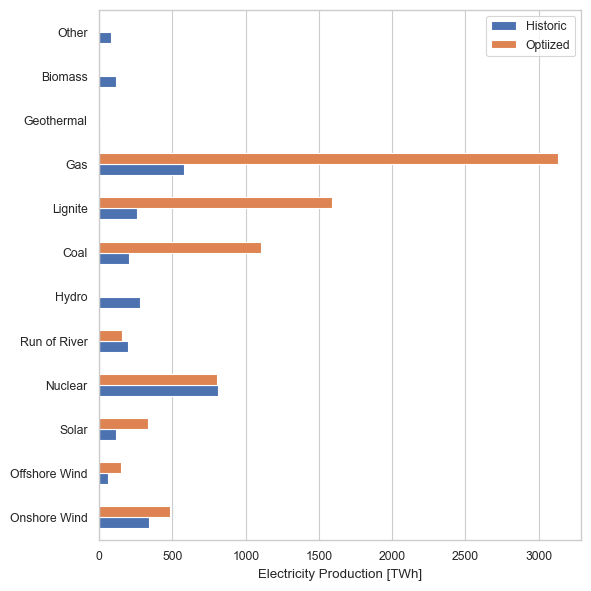

In [408]:
fig, ax = plt.subplots(figsize=(6, 6))
df = df / 1e6  # TWh
df.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [ ]:
#THIS CANNOT BE RIGHT BECAUSE ACCORDING TO THE EU, THERE WAS 2701 TWH OF ELECTRICITY PRODUCED IN THE EU 

In [415]:
sector_network.links[sector_network.links.carrier == 'lignite'].bus1.unique()

array(['AL0 0', 'AT0 0', 'BA0 0', 'BE0 0', 'BG0 0', 'CH0 0', 'CZ0 0',
       'DE0 0', 'DK0 0', 'DK1 0', 'EE0 0', 'ES0 0', 'ES6 0', 'FI1 0',
       'FR0 0', 'FR5 0', 'GB2 0', 'GB3 0', 'GR0 0', 'HR0 0', 'HU0 0',
       'IE3 0', 'IT0 0', 'IT4 0', 'LT0 0', 'LU0 0', 'LV0 0', 'ME0 0',
       'MK0 0', 'NL0 0', 'NO1 0', 'PL0 0', 'PT0 0', 'RO0 0', 'RS0 0',
       'SE1 0', 'SI0 0', 'SK0 0', 'XK0 0'], dtype=object)

In [426]:
electric_network_exclusive_solve.statistics().loc['Generator']

Optimal Capacity  Installed Capacity        Supply  \
Combined-Cycle Gas            209394.26057        209394.21950  3.060806e+07   
Offshore Wind (AC)                 0.03120             0.00000  8.828088e+01   
Offshore Wind (DC)                 0.02157             0.00000  7.770498e+01   
Offshore Wind (Floating)           0.02663             0.00000  6.476050e+01   
Onshore Wind                   90489.47282             0.00000  3.108092e+08   
Open-Cycle Gas                    23.31008            23.31000  3.587420e+00   
Run of River                   48341.66702         48341.66702  1.543674e+08   
Solar                              0.35105             0.00000  3.765372e+02   
biomass                        12011.46518         12011.46098  1.026804e+08   
coal                           92974.89857         92974.86606  5.678122e+08   
geothermal                        98.00000            98.00000  8.584255e+05   
lignite                        60675.93953         60675.92720  5.292461e+08   
nuclear                       127614.10000        127614.10000  8.015899e+08   
oil                             6025.02601          6025.02171  7.070250e+00   
solar-hsat                    226572.77326             0.00000  3.960054e+08   

                          Withdrawal  Energy Balance  Transmission  \
Combined-Cycle Gas               0.0    3.060806e+07           0.0   
Offshore Wind (AC)               0.0    8.828088e+01           0.0   
Offshore Wind (DC)               0.0    7.770498e+01           0.0   
Offshore Wind (Floating)         0.0    6.476050e+01           0.0   
Onshore Wind                     0.0    3.108092e+08           0.0   
Open-Cycle Gas                   0.0    3.587420e+00           0.0   
Run of River                     0.0    1.543674e+08           0.0   
Solar                            0.0    3.765372e+02           0.0   
biomass                          0.0    1.026804e+08           0.0   
coal                             0.0    5.678122e+08           0.0   
geothermal                       0.0    8.584255e+05           0.0   
lignite                          0.0    5.292461e+08           0.0   
nuclear                          0.0    8.015899e+08           0.0   
oil                              0.0    7.070250e+00           0.0   
solar-hsat                       0.0    3.960054e+08           0.0   

                          Capacity Factor   Curtailment  Capital Expenditure  \
Combined-Cycle Gas           1.668656e-02  1.803686e+09         2.194201e+10   
Offshore Wind (AC)           3.230769e-01  3.091604e+01         6.404799e+03   
Offshore Wind (DC)           4.112193e-01  2.620226e+01         5.031056e+03   
Offshore Wind (Floating)     2.775066e-01  2.689555e+01         6.211403e+03   
Onshore Wind                 3.920954e-01  9.015400e+05         9.197723e+09   
Open-Cycle Gas               1.758896e-05  2.041927e+05         1.112326e+06   
Run of River                 3.645272e-01  1.286559e+04         1.489747e+10   
Solar                        1.224327e-01  4.381746e+01         1.343928e+04   
biomass                      9.758595e-01  2.540076e+06         3.533786e+09   
coal                         6.971639e-01  2.466480e+08         3.135188e+10   
geothermal                   9.999365e-01  5.448588e+01         3.176494e+08   
lignite                      9.957196e-01  2.275131e+06         2.046041e+10   
nuclear                      7.170501e-01  8.636941e+06         9.619349e+10   
oil                          1.344393e-07  5.277922e+07         2.415228e+08   
solar-hsat                   1.995213e-01  3.657712e+06         1.008011e+10   

                          Operational Expenditure       Revenue  Market Value  
Combined-Cycle Gas                   1.467985e+09  1.473402e+09     48.137717  
Offshore Wind (AC)                   2.209050e+00  2.978725e+03     33.734127  
Offshore Wind (DC)                   1.935210e+00  2.618505e+03     33.700113  
Offshore Wind (Floating

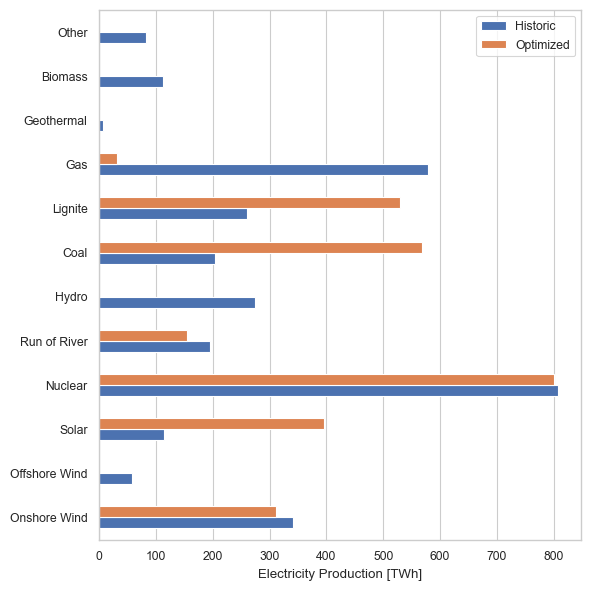

In [428]:
#electricity demand for our model must be much larger than the demand from the soley electric model 

df_electric_solve = df = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), electric_network_exclusive_solve.statistics().loc['Generator']['Supply'], matched_data_dictionary )
df_electric_solve

fig, ax = plt.subplots(figsize=(6, 6))
df_electric_solve = df_electric_solve / 1e6  # TWh
df_electric_solve.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [411]:
gas_dispatch.sum().sum()

9466480.7595837

In [437]:
historic_countries = historic.columns.get_level_values(0).unique()

In [466]:
optimized_countries = optimized.index.get_level_values(0).unique()
optimized_countries = sector_network.buses['country'].unique()
list(optimized_countries)
for i in sector_network.buses.index:
    print(i)

AL0 0
AT0 0
BA0 0
BE0 0
BG0 0
CH0 0
CZ0 0
DE0 0
DK0 0
DK1 0
EE0 0
ES0 0
ES6 0
FI1 0
FR0 0
FR5 0
GB2 0
GB3 0
GR0 0
HR0 0
HU0 0
IE3 0
IT0 0
IT4 0
LT0 0
LU0 0
LV0 0
ME0 0
MK0 0
NL0 0
NO1 0
PL0 0
PT0 0
RO0 0
RS0 0
SE1 0
SI0 0
SK0 0
XK0 0
EU lignite
EU coal
EU oil
EU oil primary
EU uranium
EU
co2 atmosphere
AL0 0 co2 stored
AT0 0 co2 stored
BA0 0 co2 stored
BE0 0 co2 stored
BG0 0 co2 stored
CH0 0 co2 stored
CZ0 0 co2 stored
DE0 0 co2 stored
DK0 0 co2 stored
DK1 0 co2 stored
EE0 0 co2 stored
ES0 0 co2 stored
ES6 0 co2 stored
FI1 0 co2 stored
FR0 0 co2 stored
FR5 0 co2 stored
GB2 0 co2 stored
GB3 0 co2 stored
GR0 0 co2 stored
HR0 0 co2 stored
HU0 0 co2 stored
IE3 0 co2 stored
IT0 0 co2 stored
IT4 0 co2 stored
LT0 0 co2 stored
LU0 0 co2 stored
LV0 0 co2 stored
ME0 0 co2 stored
MK0 0 co2 stored
NL0 0 co2 stored
NO1 0 co2 stored
PL0 0 co2 stored
PT0 0 co2 stored
RO0 0 co2 stored
RS0 0 co2 stored
SE1 0 co2 stored
SI0 0 co2 stored
SK0 0 co2 stored
XK0 0 co2 stored
AL0 0 co2 sequestered
AT0 0 co2 s

In [462]:
historic_countries.difference(optimized_countries)
set(optimized_countries) - set(historic_countries)

{'', 'AL', 'XK'}

snapshot                              2019-01-01 00:00:00 2019-01-01 06:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                    0.001306            0.001181   
        offwind-ac                               0.000166             0.00012   
        offwind-float                            0.000201            0.000159   
        onwind                                   0.000076            0.000057   
...                                                   ...                 ...   
XK      solar-hsat                                    0.0            0.001007   
        unsustainable biogas                          0.0                 0.0   
        urban central heat vent                 -0.000327           -0.000313   
        urban central solar thermal                   0.0            0.000101   
        urban decentral solar thermal                 0.0            0.000138   

snapshot                              2019-01-01 12:00:00 2019-01-01 18:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                    0.005609            0.005678   
        offwind-ac                               0.000088            0.000022   
        offwind-float                            0.000108            0.000032   
        onwind                                   0.000028            0.000004   
...                                                   ...                 ...   
XK      solar-hsat                               0.000712                 0.0   
        unsustainable biogas                          0.0                 0.0   
        urban central heat vent                 -0.000317           -0.000318   
        urban central solar thermal              0.000042                 0.0   
        urban decentral solar thermal            0.000056                 0.0   

snapshot                              2019-01-02 00:00:00 2019-01-02 06:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                     0.00565            0.012437   
        offwind-ac                                    0.0                 0.0   
        offwind-float                            0.000002                 0.0   
        onwind                                        0.0                 0.0   
...                                                   ...                 ...   
XK      solar-hsat                                    0.0            0.001964   
        unsustainable biogas                          0.0                 0.0   
        urban central heat vent                 -0.000312            -0.00028   
        urban central solar thermal                   0.0            0.000139   
        urban decentral solar thermal                 0.0            0.000199   

snapshot                              2019-01-02 12:00:00 2019-01-02 18:00:00  \
country carrier                                                                 
AL      biogas                                        0.0                 0.0   
        hydro                                  297.851632           18.146697   
        offwind-ac                                0.00003            0.000098   
        offwind-float                            0.000054            0.000169   
        onwind                                   0.000009            0.000033   
...                                                   ...                 ...   
XK      solar-hsat                               0.000399                 0.0   
        unsustainable biogas                          0.0                 0.0   
        urban central heat v

## With dynamic fuel pricing

In [467]:
electric_sector_dynamic = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39_elec_.nc')

INFO:pypsa.io:Imported network base_s_39_elec_.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


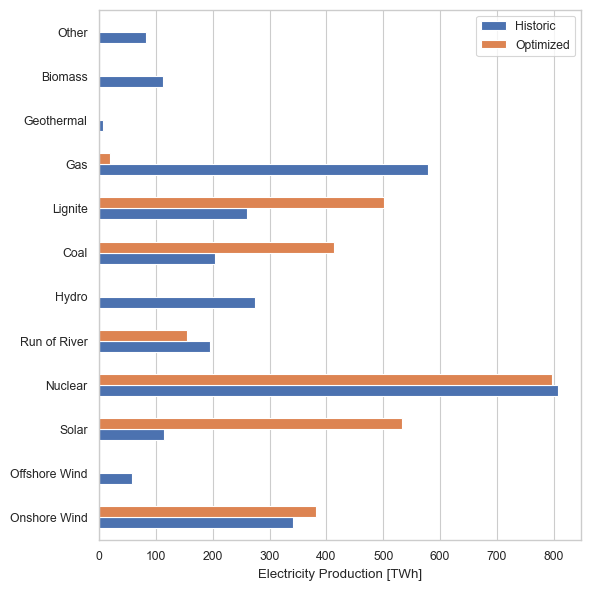

In [469]:
#electricity demand for our model must be much larger than the demand from the soley electric model 

df_electric_solve = df = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), electric_sector_dynamic.statistics().loc['Generator']['Supply'], matched_data_dictionary )
df_electric_solve

fig, ax = plt.subplots(figsize=(6, 6))
df_electric_solve = df_electric_solve / 1e6  # TWh
df_electric_solve.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [472]:
electric_network_exclusive_solve.statistics().loc['Generator']

Optimal Capacity  Installed Capacity        Supply  \
Combined-Cycle Gas            209394.26057        209394.21950  3.060806e+07   
Offshore Wind (AC)                 0.03120             0.00000  8.828088e+01   
Offshore Wind (DC)                 0.02157             0.00000  7.770498e+01   
Offshore Wind (Floating)           0.02663             0.00000  6.476050e+01   
Onshore Wind                   90489.47282             0.00000  3.108092e+08   
Open-Cycle Gas                    23.31008            23.31000  3.587420e+00   
Run of River                   48341.66702         48341.66702  1.543674e+08   
Solar                              0.35105             0.00000  3.765372e+02   
biomass                        12011.46518         12011.46098  1.026804e+08   
coal                           92974.89857         92974.86606  5.678122e+08   
geothermal                        98.00000            98.00000  8.584255e+05   
lignite                        60675.93953         60675.92720  5.292461e+08   
nuclear                       127614.10000        127614.10000  8.015899e+08   
oil                             6025.02601          6025.02171  7.070250e+00   
solar-hsat                    226572.77326             0.00000  3.960054e+08   

                          Withdrawal  Energy Balance  Transmission  \
Combined-Cycle Gas               0.0    3.060806e+07           0.0   
Offshore Wind (AC)               0.0    8.828088e+01           0.0   
Offshore Wind (DC)               0.0    7.770498e+01           0.0   
Offshore Wind (Floating)         0.0    6.476050e+01           0.0   
Onshore Wind                     0.0    3.108092e+08           0.0   
Open-Cycle Gas                   0.0    3.587420e+00           0.0   
Run of River                     0.0    1.543674e+08           0.0   
Solar                            0.0    3.765372e+02           0.0   
biomass                          0.0    1.026804e+08           0.0   
coal                             0.0    5.678122e+08           0.0   
geothermal                       0.0    8.584255e+05           0.0   
lignite                          0.0    5.292461e+08           0.0   
nuclear                          0.0    8.015899e+08           0.0   
oil                              0.0    7.070250e+00           0.0   
solar-hsat                       0.0    3.960054e+08           0.0   

                          Capacity Factor   Curtailment  Capital Expenditure  \
Combined-Cycle Gas           1.668656e-02  1.803686e+09         2.194201e+10   
Offshore Wind (AC)           3.230769e-01  3.091604e+01         6.404799e+03   
Offshore Wind (DC)           4.112193e-01  2.620226e+01         5.031056e+03   
Offshore Wind (Floating)     2.775066e-01  2.689555e+01         6.211403e+03   
Onshore Wind                 3.920954e-01  9.015400e+05         9.197723e+09   
Open-Cycle Gas               1.758896e-05  2.041927e+05         1.112326e+06   
Run of River                 3.645272e-01  1.286559e+04         1.489747e+10   
Solar                        1.224327e-01  4.381746e+01         1.343928e+04   
biomass                      9.758595e-01  2.540076e+06         3.533786e+09   
coal                         6.971639e-01  2.466480e+08         3.135188e+10   
geothermal                   9.999365e-01  5.448588e+01         3.176494e+08   
lignite                      9.957196e-01  2.275131e+06         2.046041e+10   
nuclear                      7.170501e-01  8.636941e+06         9.619349e+10   
oil                          1.344393e-07  5.277922e+07         2.415228e+08   
solar-hsat                   1.995213e-01  3.657712e+06         1.008011e+10   

                          Operational Expenditure       Revenue  Market Value  
Combined-Cycle Gas                   1.467985e+09  1.473402e+09     48.137717  
Offshore Wind (AC)                   2.209050e+00  2.978725e+03     33.734127  
Offshore Wind (DC)                   1.935210e+00  2.618505e+03     33.700113  
Offshore Wind (Floating

In [471]:
electric_sector_dynamic.statistics().loc['Generator']

Optimal Capacity  Installed Capacity        Supply  \
Combined-Cycle Gas            209394.22817        209394.21950  1.802687e+07   
Offshore Wind (AC)                 0.02176             0.00000  6.550577e+01   
Offshore Wind (DC)                 0.01587             0.00000  6.069884e+01   
Offshore Wind (Floating)           0.01744             0.00000  4.399372e+01   
Onshore Wind                  113941.68939             0.00000  3.807840e+08   
Open-Cycle Gas                    23.31000            23.31000  2.022600e+00   
Run of River                   48341.66702         48341.66702  1.543773e+08   
Solar                              0.27899             0.00000  2.964407e+02   
biomass                        12011.46286         12011.46098  1.017339e+08   
coal                           92974.88157         92974.86606  4.131683e+08   
geothermal                        98.00000            98.00000  8.584266e+05   
lignite                        60675.92984         60675.92720  5.014082e+08   
nuclear                       127614.10000        127614.10000  7.966666e+08   
oil                             6025.02296          6025.02171  3.924630e+00   
solar-hsat                    322814.05484             0.00000  5.322708e+08   

                          Withdrawal  Energy Balance  Transmission  \
Combined-Cycle Gas               0.0    1.802687e+07           0.0   
Offshore Wind (AC)               0.0    6.550577e+01           0.0   
Offshore Wind (DC)               0.0    6.069884e+01           0.0   
Offshore Wind (Floating)         0.0    4.399372e+01           0.0   
Onshore Wind                     0.0    3.807840e+08           0.0   
Open-Cycle Gas                   0.0    2.022600e+00           0.0   
Run of River                     0.0    1.543773e+08           0.0   
Solar                            0.0    2.964407e+02           0.0   
biomass                          0.0    1.017339e+08           0.0   
coal                             0.0    4.131683e+08           0.0   
geothermal                       0.0    8.584266e+05           0.0   
lignite                          0.0    5.014082e+08           0.0   
nuclear                          0.0    7.966666e+08           0.0   
oil                              0.0    3.924630e+00           0.0   
solar-hsat                       0.0    5.322708e+08           0.0   

                          Capacity Factor   Curtailment  Capital Expenditure  \
Combined-Cycle Gas           9.827692e-03  1.816267e+09         2.194201e+10   
Offshore Wind (AC)           3.437500e-01  1.904128e+01         4.468437e+03   
Offshore Wind (DC)           4.366730e-01  1.619697e+01         3.699008e+03   
Offshore Wind (Floating)     2.878440e-01  1.637810e+01         4.067865e+03   
Onshore Wind                 3.814977e-01  2.083839e+06         1.158150e+10   
Open-Cycle Gas               9.867010e-06  2.041936e+05         1.112322e+06   
Run of River                 3.645506e-01  2.978573e+03         1.489747e+10   
Solar                        1.212947e-01  2.883692e+01         1.068065e+04   
biomass                      9.668646e-01  3.486525e+06         3.533785e+09   
coal                         5.072911e-01  4.012917e+08         3.135188e+10   
geothermal                   9.999379e-01  5.339176e+01         3.176494e+08   
lignite                      9.433457e-01  3.011294e+07         2.046041e+10   
nuclear                      7.126460e-01  1.356028e+07         9.619349e+10   
oil                          7.468851e-08  5.277920e+07         2.415227e+08   
solar-hsat                   1.882245e-01  5.185437e+06         1.436184e+10   

                          Operational Expenditure       Revenue  Market Value  
Combined-Cycle Gas                   1.085764e+09  1.087148e+09     60.307077  
Offshore Wind (AC)                   1.630730e+00  2.423692e+03     36.989305  
Offshore Wind (DC)                   1.519580e+00  2.252127e+03     37.098124  
Offshore Wind (Floating

In [473]:
#and with the sector network, has anything changed? 
sector_network_dynamic = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc')
sector_network_dynamic

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Unnamed PyPSA Network
---------------------
Components:
 - Bus: 859
 - Carrier: 111
 - Generator: 953
 - GlobalConstraint: 2
 - Line: 71
 - Link: 3824
 - Load: 621
 - StorageUnit: 56
 - Store: 351
Snapshots: 1460

In [475]:
sector_network_dynamic.statistics().loc['Generator']

Optimal Capacity  \
Offshore Wind (AC)                             3.236667e+04   
Offshore Wind (DC)                             2.262000e-02   
Offshore Wind (Floating)                       2.342000e-02   
Onshore Wind                                   2.291943e+05   
Run of River                                   4.834167e+04   
Solar                                          2.764823e+05   
biogas                                         1.085807e+04   
coal                                           3.350514e+05   
gas                                            1.584665e+06   
geothermal                                     9.800015e+01   
lignite                                        1.839225e+05   
nuclear                                        1.276141e+05   
oil primary                                    9.657040e+05   
residential rural solar thermal                1.640900e-01   
residential urban decentral solar thermal      1.823600e-01   
solar rooftop                                  5.225832e+03   
solar-hsat                                     7.409425e+04   
solid biomass                                  1.550627e+07   
unsustainable biogas                           1.978366e+08   
unsustainable bioliquids                       1.921633e+08   
unsustainable solid biomass                    1.206563e+09   
urban central heat vent                        3.011385e+03   
urban central solar thermal                    1.359500e-01   

                                           Installed Capacity        Supply  \
Offshore Wind (AC)                               3.236665e+04  1.515704e+08   
Offshore Wind (DC)                               0.000000e+00  8.288645e+01   
Offshore Wind (Floating)                         0.000000e+00  5.557914e+01   
Onshore Wind                                     2.229871e+05  4.861640e+08   
Run of River                                     4.834167e+04  1.543794e+08   
Solar                                            2.764823e+05  3.304026e+08   
biogas                                           1.085807e+04  5.382200e-01   
coal                                             0.000000e+00  1.101694e+09   
gas                                              1.584665e+06  3.134493e+09   
geothermal                                       9.800000e+01  8.584776e+05   
lignite                                          0.000000e+00  1.589978e+09   
nuclear                                          1.276141e+05  8.041827e+08   
oil primary                                      0.000000e+00  5.760052e+09   
residential rural solar thermal                  0.000000e+00  5.254437e+01   
residential urban decentral solar thermal        0.000000e+00  6.402147e+01   
solar rooftop                                    0.000000e+00  8.315125e+06   
solar-hsat                                       0.000000e+00  1.373170e+08   
solid biomass                                    1.550627e+07  1.483325e+01   
unsustainable biogas                             1.978366e+08  1.978366e+08   
unsustainable bioliquids                         1.921633e+08  1.921633e+08   
unsustainable solid biomass                      1.206563e+09  1.206563e+09   
urban central heat vent                          0.000000e+00  0.000000e+00   
urban central solar thermal                      0.000000e+00  4.263345e+01   

                                             Withdrawal  Energy Balance  \
Offshore Wind (AC)                              0.00000    1.515704e+08   
Offshore Wind (DC)                              0.00000    8.288645e+01   
Offshore Wind (Floating)                        0.00000    5.557914e+01   
Onshore Wind                                    0.00000    4.861640e+08   
Run of River                                    0.00000    1.543794e+08   
Solar                                           0.00000    3.304026e+08   
biogas                                          0.00000    5.382200e-01   
coal                             

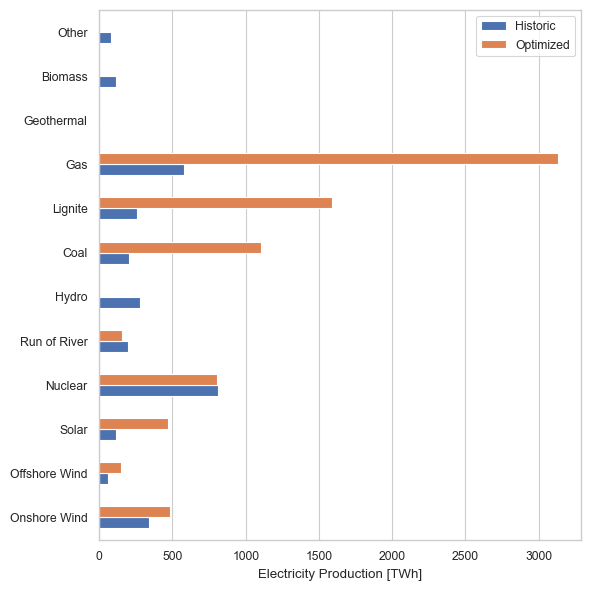

In [545]:
#electricity demand for our model must be much larger than the demand from the soley electric model 

df_sector_solve = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), sector_network_dynamic.statistics().loc['Generator']['Supply'], matched_data_dictionary )
df_sector_solve

fig, ax = plt.subplots(figsize=(6, 6))
df_sector_solve = df_sector_solve / 1e6  # TWh
df_sector_solve.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [499]:
electric_loads = sector_network_dynamic.loads[sector_network_dynamic.loads.carrier.isin(['electricity', 'industry electricity', 'agriculture electricity'])].index
electric_load = sector_network_dynamic.loads_t.p[electric_loads].sum().sum() * 6 #for MWh
print(f"The electric load for the fully sector dynamic one it {electric_load:.2e}")

The electric load for the fully sector dynamic one it 2.66e+09


In [489]:
electric_loads = electric_sector_dynamic.loads[electric_sector_dynamic.loads.carrier == ''].index
electric_load = electric_sector_dynamic.loads_t.p[electric_loads].sum().sum() * 6 #for MWh
print(f"The electric load for the fully electric dynamic one it {electric_load:.2e}")

The electric load for the fully electric dynamic one it 1.91e+10


The electric loads are different between the models?


In [502]:
sector_network_dynamic.links.carrier.unique()

array(['DC', 'oil refining', 'co2 sequestered', 'OCGT', 'lignite', 'coal',
       'CCGT', 'H2 Electrolysis', 'H2 Fuel Cell', 'gas pipeline',
       'gas pipeline new', 'H2 pipeline retrofitted', 'H2 pipeline',
       'battery charger', 'battery discharger', 'Sabatier', 'SMR CC',
       'SMR', 'land transport oil', 'urban central air heat pump',
       'urban central water tanks charger',
       'urban central water tanks discharger',
       'urban central resistive heater', 'urban central gas boiler',
       'urban central CHP', 'urban central CHP CC',
       'unsustainable bioliquids', 'biogas to gas',
       'urban central solid biomass CHP',
       'urban central solid biomass CHP CC', 'solid biomass to hydrogen',
       'solid biomass for industry', 'solid biomass for industry CC',
       'gas for industry', 'gas for industry CC', 'industry methanol',
       'methanolisation', 'shipping oil', 'Fischer-Tropsch',
       'naphtha for industry', 'kerosene for aviation',
       'process

In [508]:
gas_links = sector_network_dynamic.links[sector_network_dynamic.links.carrier.isin(['CCGT', 'OCGT'])]
gas_links = gas_links.index
gas_dispatch = sector_network_dynamic.links_t.p1[gas_links]
gas_dispatch = gas_dispatch * -6 #to turn into MWh, negative to turn positive even though link is delivering power to electric utilities
gas_dispatch = gas_dispatch.sum().sum()
print(f'gas dispatch in sector dynamic model is {gas_dispatch:.2e} ')


gas dispatch in sector dynamic model is 9.47e+06 


In [517]:
#electric network calculation in the same way 
gas_generators = electric_sector_dynamic.generators[electric_sector_dynamic.generators.carrier.isin(['CCGT', 'OCGT'])].index
gas_dispatch = electric_sector_dynamic.generators_t.p[gas_generators] #this is already in MWH
gas_dispatch = gas_dispatch.sum().sum()
print(f'gas dispatch in electric dynamic model is {gas_dispatch:.2e} ')


gas dispatch in electric dynamic model is 1.80e+07 


In [519]:
historic.T.groupby(level=1).sum().sum(axis=1)

Biomass          1.115539e+08
Coal             2.040682e+08
Gas              5.783204e+08
Geothermal       5.943592e+06
Hydro            2.749564e+08
Lignite          2.596650e+08
Nuclear          8.082461e+08
Offshore Wind    5.820952e+07
Oil              1.742395e+07
Onshore Wind     3.420156e+08
Other            8.299940e+07
Run of River     1.942309e+08
Solar            1.141698e+08
dtype: float64

In [528]:
#Installed gas capcity = 1.584665e+06	
#in electric sector dynamic model , installed capcity of CCGT is 209394.21950 
#combustible fuels MW capacity in 2020 = 389,280 #https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Table_2_Maximum_electrical_capacity,_EU,_2000_-_2022_(Megawatt).png 
sector_network_dynamic.links.groupby(sector_network_dynamic.links.carrier).sum().p_nom_opt


carrier
CCGT                                      373139.273371
DAC                                            0.006493
DC                                        122949.595248
Fischer-Tropsch                                0.071132
H2 Electrolysis                                0.041667
                                              ...      
urban decentral gas boiler                633132.077568
urban decentral oil boiler                278882.913656
urban decentral resistive heater          227974.968736
urban decentral water tanks charger            7.623879
urban decentral water tanks discharger         6.850625
Name: p_nom_opt, Length: 66, dtype: float64

In [524]:
gas_links

Index(['AL0 0 OCGT-2020', 'AT0 0 OCGT-2020', 'BA0 0 OCGT-2020',
       'BE0 0 OCGT-2020', 'BG0 0 OCGT-2020', 'CH0 0 OCGT-2020',
       'CZ0 0 OCGT-2020', 'DE0 0 OCGT-2020', 'DK0 0 OCGT-2020',
       'DK1 0 OCGT-2020',
       ...
       'GR0 0 CCGT-2025', 'HR0 0 CCGT-2025', 'IE3 0 CCGT-2025',
       'IT0 0 CCGT-2025', 'NL0 0 CCGT-2025', 'PL0 0 CCGT-2025',
       'RO0 0 CCGT-2025', 'SI0 0 CCGT-2025', 'DE0 0 CCGT-2027',
       'RO0 0 CCGT-2027'],
      dtype='object', name='Link', length=258)

In [533]:
sector_dynamic_network2030 = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc')
sector_dynamic_network2030.statistics().loc['Link']

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Optimal Capacity  Installed Capacity  \
Combined-Cycle Gas                        373139.27337        372153.35983   
DAC                                            0.00649             0.00000   
DC                                        122949.59525         54040.00000   
Fischer-Tropsch                                0.07113             0.00000   
H2 Electrolysis                                0.04167             0.00000   
...                                                ...                 ...   
urban central solid biomass CHP            62995.57703         43593.08657   
urban central solid biomass CHP CC             0.02350             0.00000   
urban central water tanks charger          22128.22270             0.00000   
urban central water tanks discharger       28359.94477             0.00000   
urban decentral oil boiler                278882.91366        278882.91366   

                                            Supply    Withdrawal  \
Combined-Cycle Gas                    1.281347e+07  1.690432e+07   
DAC                                   4.588001e+01  1.353460e+02   
DC                                    3.141798e+08  3.245033e+08   
Fischer-Tropsch                       3.817441e+02  5.536294e+02   
H2 Electrolysis                       1.224207e+02  1.919794e+02   
...                                            ...           ...   
urban central solid biomass CHP       4.591842e+08  4.204825e+08   
urban central solid biomass CHP CC    1.646071e+02  1.590201e+02   
urban central water tanks charger     1.465812e+07  1.628680e+07   
urban central water tanks discharger  1.311845e+07  1.457606e+07   
urban decentral oil boiler            2.832534e+07  3.122024e+07   

                                      Energy Balance  Transmission  \
Combined-Cycle Gas                     -4.090844e+06  0.000000e+00   
DAC                                    -8.946602e+01  0.000000e+00   
DC                                     -1.032344e+07  3.245033e+08   
Fischer-Tropsch                        -1.718853e+02  0.000000e+00   
H2 Electrolysis                        -6.955873e+01  0.000000e+00   
...                                              ...           ...   
urban central solid biomass CHP         3.870167e+07  0.000000e+00   
urban central solid biomass CHP CC      5.586980e+00  0.000000e+00   
urban central water tanks charger      -1.628680e+06  0.000000e+00   
urban central water tanks discharger   -1.457606e+06  0.000000e+00   
urban decentral oil boiler             -2.894901e+06  0.000000e+00   

                                      Capacity Factor  Curtailment  \
Combined-Cycle Gas                           0.005172          0.0   
DAC                                          0.443760          0.0   
DC                                           0.301292          0.0   
Fischer-Tropsch                              0.737101          0.0   
H2 Electrolysis                              0.526038          0.0   
...                                               ...          ...   
urban central solid biomass CHP              0.761963          0.0   
urban central solid biomass CHP CC           0.580851          0.0   
urban central water tanks charger            0.084020          0.0   
urban central water tanks discharger         0.058672          0.0   
urban decentral oil boiler                   0.012779          0.0   

                                      Capital Expenditure  \
Combined-Cycle Gas                           2.317662e+10   
DAC                                          1.189083e+04   
DC                                           3.238075e+09   
Fischer-Tropsch                              5.790932e+03   
H2 Electrolysis                              1.048431e+04   
...                                                   ...   
urban central solid biomass CHP              7.265472e+09   
urban central solid biomass CHP CC           7.472891e+03   
urban central water tanks charger            0.000000

In [535]:
sector_network_dynamic.statistics().loc['Link']

Optimal Capacity  Installed Capacity  \
Combined-Cycle Gas                        373139.27337        372153.35983   
DAC                                            0.00649             0.00000   
DC                                        122949.59525         54040.00000   
Fischer-Tropsch                                0.07113             0.00000   
H2 Electrolysis                                0.04167             0.00000   
...                                                ...                 ...   
urban central solid biomass CHP            62995.57703         43593.08657   
urban central solid biomass CHP CC             0.02350             0.00000   
urban central water tanks charger          22128.22270             0.00000   
urban central water tanks discharger       28359.94477             0.00000   
urban decentral oil boiler                278882.91366        278882.91366   

                                            Supply    Withdrawal  \
Combined-Cycle Gas                    1.281347e+07  1.690432e+07   
DAC                                   4.588001e+01  1.353460e+02   
DC                                    3.141798e+08  3.245033e+08   
Fischer-Tropsch                       3.817441e+02  5.536294e+02   
H2 Electrolysis                       1.224207e+02  1.919794e+02   
...                                            ...           ...   
urban central solid biomass CHP       4.591842e+08  4.204825e+08   
urban central solid biomass CHP CC    1.646071e+02  1.590201e+02   
urban central water tanks charger     1.465812e+07  1.628680e+07   
urban central water tanks discharger  1.311845e+07  1.457606e+07   
urban decentral oil boiler            2.832534e+07  3.122024e+07   

                                      Energy Balance  Transmission  \
Combined-Cycle Gas                     -4.090844e+06  0.000000e+00   
DAC                                    -8.946602e+01  0.000000e+00   
DC                                     -1.032344e+07  3.245033e+08   
Fischer-Tropsch                        -1.718853e+02  0.000000e+00   
H2 Electrolysis                        -6.955873e+01  0.000000e+00   
...                                              ...           ...   
urban central solid biomass CHP         3.870167e+07  0.000000e+00   
urban central solid biomass CHP CC      5.586980e+00  0.000000e+00   
urban central water tanks charger      -1.628680e+06  0.000000e+00   
urban central water tanks discharger   -1.457606e+06  0.000000e+00   
urban decentral oil boiler             -2.894901e+06  0.000000e+00   

                                      Capacity Factor  Curtailment  \
Combined-Cycle Gas                           0.005172          0.0   
DAC                                          0.443760          0.0   
DC                                           0.301292          0.0   
Fischer-Tropsch                              0.737101          0.0   
H2 Electrolysis                              0.526038          0.0   
...                                               ...          ...   
urban central solid biomass CHP              0.761963          0.0   
urban central solid biomass CHP CC           0.580851          0.0   
urban central water tanks charger            0.084020          0.0   
urban central water tanks discharger         0.058672          0.0   
urban decentral oil boiler                   0.012779          0.0   

                                      Capital Expenditure  \
Combined-Cycle Gas                           2.317662e+10   
DAC                                          1.189083e+04   
DC                                           3.238075e+09   
Fischer-Tropsch                              5.790932e+03   
H2 Electrolysis                              1.048431e+04   
...                                                   ...   
urban central solid biomass CHP              7.265472e+09   
urban central solid biomass CHP CC           7.472891e+03   
urban central water tanks charger            0.000000

In [542]:
sector_network_dynamic.carriers.sort_values(by = 'co2_emissions')

co2_emissions    color                nice_name  \
Carrier                                                                    
co2                              -1.00  #f29dae                      co2   
AC                                0.00  #70af1d                       AC   
SMR                               0.00  #870c71                      SMR   
oil refining                      0.00  #e6e6e6             oil refining   
H2 pipeline retrofitted           0.00  #ba99b5  H2 pipeline retrofitted   
...                                ...      ...                      ...   
home battery                      0.00  #80c944             home battery   
methanol                          0.00  #FF7B00                 methanol   
naphtha for industry              0.00  #57ebc4     naphtha for industry   
rural oil boiler                  0.00  #adadad         rural oil boiler   
geothermal                        0.12  #ba91b1               geothermal   

                         max_growth  max_relative_growth  
Carrier                                                   
co2                             inf                  0.0  
AC                              inf                  0.0  
SMR                             inf                  0.0  
oil refining                    inf                  0.0  
H2 pipeline retrofitted         inf                  0.0  
...                             ...                  ...  
home battery                    inf                  0.0  
methanol                        inf                  0.0  
naphtha for industry            inf                  0.0  
rural oil boiler                inf                  0.0  
geothermal                      inf                  0.0  

[111 rows x 5 columns]

In [543]:
sector_network_dynamic.carriers.filter(like="_emissions")

co2_emissions
Carrier                                              
AC                                               0.00
DC                                               0.00
geothermal                                       0.12
nuclear                                          0.00
solar                                            0.00
...                                               ...
urban decentral water tanks                      0.00
urban decentral water tanks charger              0.00
urban decentral water tanks discharger           0.00
urban decentral oil boiler                       0.00
rural oil boiler                                 0.00

[111 rows x 1 columns]

## Electric only model with monthly fuel prices and a 25 EUR/t carbon emission price 

In [ ]:
carbon_price_electric_model = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39_elec_.nc')
carbon_price_electric_model #price = 25 EUR/tCo2 

INFO:pypsa.io:Imported network base_s_39_elec_.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Unnamed PyPSA Network
---------------------
Components:
 - Bus: 117
 - Carrier: 26
 - Generator: 356
 - Line: 71
 - Link: 205
 - Load: 39
 - StorageUnit: 95
 - Store: 78
Snapshots: 8760

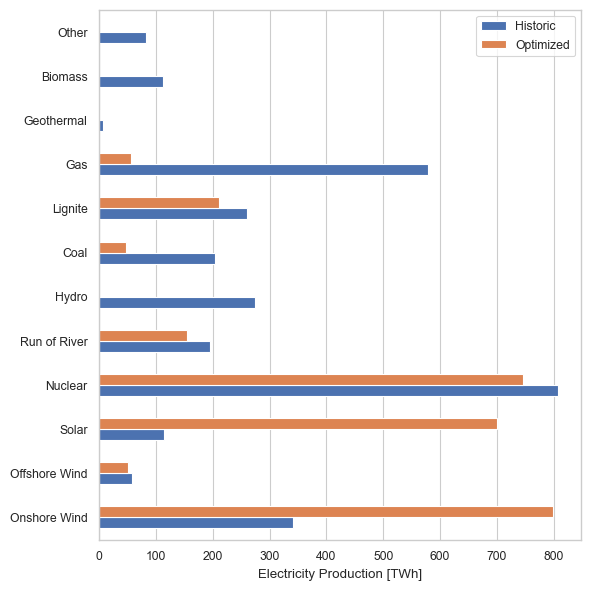

In [546]:
#electricity demand for our model must be much larger than the demand from the soley electric model 

df_electric_solve_with_price = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), carbon_price_electric_model.statistics().loc['Generator']['Supply'], matched_data_dictionary )
df_electric_solve_with_price

fig, ax = plt.subplots(figsize=(6, 6))
df_electric_solve_with_price = df_electric_solve_with_price / 1e6  # TWh
df_electric_solve_with_price.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [547]:
carbon_price_electric_model = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39_elec_.nc')
carbon_price_electric_model #price = 15 EUR/tCo2 

INFO:pypsa.io:Imported network base_s_39_elec_.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Unnamed PyPSA Network
---------------------
Components:
 - Bus: 117
 - Carrier: 26
 - Generator: 356
 - Line: 71
 - Link: 205
 - Load: 39
 - StorageUnit: 95
 - Store: 78
Snapshots: 8760

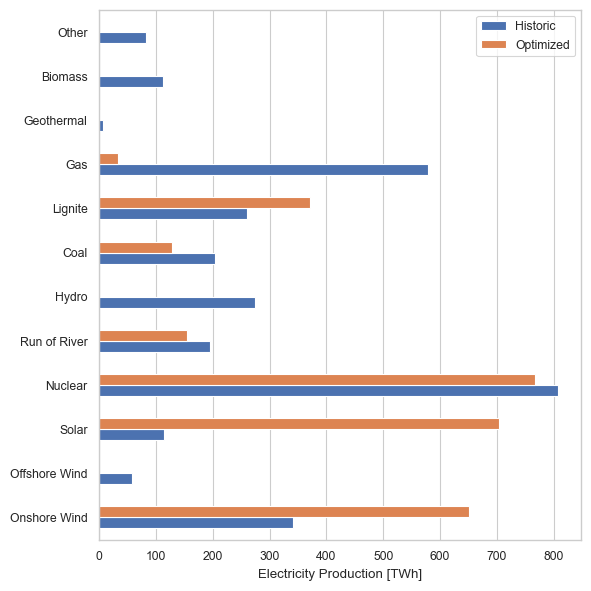

In [548]:
#electricity demand for our model must be much larger than the demand from the soley electric model 

df_electric_solve_with_price = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), carbon_price_electric_model.statistics().loc['Generator']['Supply'], matched_data_dictionary )
df_electric_solve_with_price

fig, ax = plt.subplots(figsize=(6, 6))
df_electric_solve_with_price = df_electric_solve_with_price / 1e6  # TWh
df_electric_solve_with_price.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [550]:
#more lignite but alsmo more solar and wind instead of more gas... why? 
#new sector with conventional_carriers: but it includes - gas (don't know if it does anything, but have to try...)
sector_network_with_a_15_carbon_price_and_gas_in_conventional = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc')
sector_network_with_a_15_carbon_price_and_gas_in_conventional

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Unnamed PyPSA Network
---------------------
Components:
 - Bus: 859
 - Carrier: 111
 - Generator: 953
 - GlobalConstraint: 2
 - Line: 71
 - Link: 3824
 - Load: 621
 - StorageUnit: 56
 - Store: 351
Snapshots: 1460

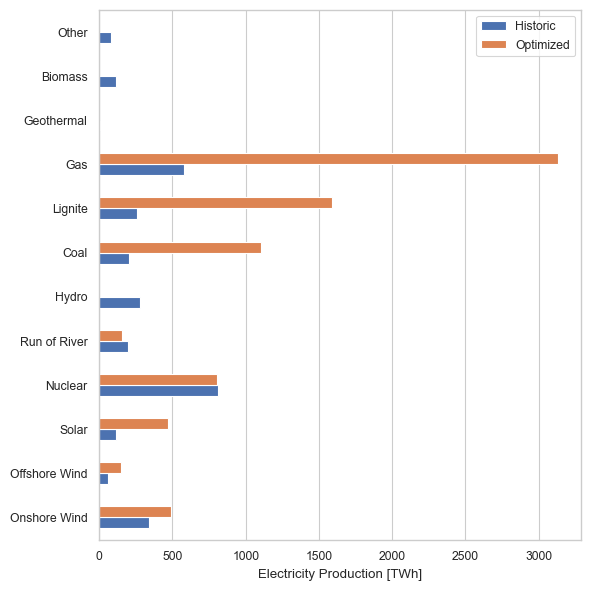

In [551]:
#electricity demand for our model must be much larger than the demand from the soley electric model 

df_gas_in_conventional_and_carbon_price = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), sector_network_with_a_15_carbon_price_and_gas_in_conventional.statistics().loc['Generator']['Supply'], matched_data_dictionary )
df_gas_in_conventional_and_carbon_price

fig, ax = plt.subplots(figsize=(6, 6))
df_gas_in_conventional_and_carbon_price = df_gas_in_conventional_and_carbon_price / 1e6  # TWh
df_gas_in_conventional_and_carbon_price.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [559]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional.statistics().loc['Link'].loc['Combined-Cycle Gas']

Optimal Capacity           3.731393e+05
Installed Capacity         3.721534e+05
Supply                     1.281098e+07
Withdrawal                 1.690103e+07
Energy Balance            -4.090049e+06
Transmission               0.000000e+00
Capacity Factor            5.170566e-03
Curtailment                0.000000e+00
Capital Expenditure        2.317662e+10
Operational Expenditure    4.422383e+07
Revenue                    4.421477e+07
Market Value               3.451318e+00
Name: Combined-Cycle Gas, dtype: float64

In [560]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional.explore()

INFO:pypsa.plot:Components rendered on the map: Bus, Line, Link.
INFO:pypsa.plot:Components omitted as they are missing or not selected: Generator, Load, StorageUnit, Transformer.


In [564]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses[sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses.carrier == 'AC'].groupby(by='country').sum()

v_nom type          x           y carrier          unit  \
country                                                            
AL       380.0       19.845426   41.518089      AC        MWh_el   
AT       380.0       14.281561   47.640213      AC        MWh_el   
BA       380.0       18.047126   43.879730      AC        MWh_el   
BE       380.0        4.888784   50.729762      AC        MWh_el   
BG       380.0       24.656324   42.922999      AC        MWh_el   
CH       380.0        8.261672   46.826635      AC        MWh_el   
CZ       380.0       15.237140   49.865927      AC        MWh_el   
DE       380.0        9.203934   51.117369      AC        MWh_el   
DK       760.0       22.031245  111.658445    ACAC  MWh_elMWh_el   
EE       380.0       25.636484   58.887368      AC        MWh_el   
ES       760.0       -0.680486   80.285279    ACAC  MWh_elMWh_el   
FI       380.0       24.702717   62.593593      AC        MWh_el   
FR       760.0       12.605438   89.593266    ACAC  MWh_elMWh_el   
GB       760.0       -8.136955  108.032772    ACAC  MWh_elMWh_el   
GR       380.0       22.849930   38.909207      AC        MWh_el   
HR       380.0       16.284188   44.808115      AC        MWh_el   
HU       380.0       19.288262   47.338342      AC        MWh_el   
IE       380.0       -7.597724   52.882553      AC        MWh_el   
IT       760.0       20.371549   83.656644    ACAC  MWh_elMWh_el   
LT       380.0       23.426630   55.296841      AC        MWh_el   
LU       380.0        6.056384   49.684566      AC        MWh_el   
LV       380.0       24.074836   56.828886      AC        MWh_el   
ME       380.0       19.085316   42.787227      AC        MWh_el   
MK       380.0       21.596582   41.675125      AC        MWh_el   
NL       380.0        5.332808   52.311531      AC        MWh_el   
NO       380.0        9.219401   61.729906      AC        MWh_el   
PL       380.0       19.060401   51.660174      AC        MWh_el   
PT       380.0       -8.248102   40.187334      AC        MWh_el   
RO       380.0       25.052874   45.557457      AC        MWh_el   
RS       380.0       20.653802   44.476645      AC        MWh_el   
SE       380.0       16.082650   60.638979      AC        MWh_el   
SI       380.0       15.043369   46.170477      AC        MWh_el   
SK       380.0       19.227945   48.601176      AC        MWh_el   
XK       380.0       20.970732   42.590911      AC        MWh_el   

         v_mag_pu_set  v_mag_pu_min  v_mag_pu_max     control      generator  \
country                                                                        
AL                1.0           0.0           inf          PQ                  
AT                1.0           0.0           inf          PQ                  
BA                1.0           0.0           inf          PQ                  
BE                1.0           0.0           inf       Slack  BE0 0 nuclear   
BG                1.0           0.0           inf          PQ                  
CH                1.0           0.0           inf          PQ                  
CZ                1.0           0.0           inf          PQ                  
DE                1.0           0.0           inf          PQ                  
DK                2.0           0.0           inf        PQPQ                  
EE                1.0           0.0           inf          PQ                  
ES                2.0           0.0           inf     PQSlack                  
FI                1.0           0.0           inf       Slack  FI1 0 nuclear   
FR                2.0           0.0           inf     PQSlack                  
GB                2.0           0.0           inf  SlackSlack  GB3 0 nuclear   
GR                1.0           0.0           inf          PQ                  
HR                1.0           0.0           inf          PQ                  
HU                1.0           0.0           inf          PQ                  
IE                1.0           0.0     

Sector with 15 EUR/tCO2 emission price (but this is a sector coupled model) with -gas included in existing_capacities: conventional_carriers 

In [575]:
#import Auxillary_Functions as af
sector_network_with_a_15_carbon_price_and_gas_in_conventional.generators.carrier.unique()

array(['nuclear', 'geothermal', 'solar', 'offwind-dc', 'onwind',
       'offwind-ac', 'offwind-float', 'solar-hsat', 'ror', 'lignite',
       'coal', 'oil primary', 'gas', 'urban central heat vent',
       'urban central solar thermal', 'biogas', 'solid biomass',
       'unsustainable biogas', 'unsustainable solid biomass',
       'unsustainable bioliquids', 'solar rooftop', 'rural solar thermal',
       'urban decentral solar thermal'], dtype=object)

In [160]:
def electric_supply_from_the_sector_models(network_choice):
    #gets the total supply from the various carriers to the electric sector of the model, where applicable 
    ##the renewable generators connect directly to the AC buses 
    ## the conventional links deliver a certain amount of energy to the AC buses -- in the sector models the big loads are connected to the low voltage buses
  network = network_choice
  supply = {}

    #renewables 
  renewable_carriers = ['solar', 'offwind-dc', 'onwind',
       'offwind-ac', 'offwind-float', 'solar-hsat', 'ror', 'solar rooftop', 'hydro', 'ror', 'PHS']
      #generators 
  renewable_generators_by_carrier = network.generators[network.generators.carrier.isin(renewable_carriers)].index
  renewable_generators_by_carrier 
  renewables_dispatch = network.generators_t.p[renewable_generators_by_carrier]
  renewables_dispatch = renewables_dispatch.T
  renewables_dispatch=renewables_dispatch.groupby(network.generators.carrier).sum()
  renewables_dispatch = renewables_dispatch * network.snapshot_weightings.objective[0] #MW --> MWh 
  renewables_dispatch = renewables_dispatch.sum(axis=1)
    #low carbon carriers
  low_carbon_carriers = ['nuclear', 'geothermal']
  low_carbon_carriers = network.generators[network.generators.carrier.isin(low_carbon_carriers)].index
  low_carbon_dispatch = network.generators_t.p[low_carbon_carriers]
  low_carbon_dispatch = low_carbon_dispatch * network.snapshot_weightings.objective[0] #MW --> MWh
  low_carbon_dispatch = low_carbon_dispatch.T
  low_carbon_dispatch = low_carbon_dispatch.groupby(network.generators.carrier).sum()
  low_carbon_dispatch = low_carbon_dispatch.sum(axis=1)
  low_carbon_dispatch
    #conventional carriers = 
  conventional_carriers = ['coal', 'lignite', 'CCGT', 'OCGT', 'oil', "urban central solid biomass CHP"] #biomass is technically low carbon, but CHP is given in links. biomass CHP only in urban central
  conventional_links = network.links[network.links.carrier.isin(conventional_carriers)].index
  conventional_links = network.links_t.p1[conventional_links]#power delivered to the end bus 
  conventional_links = conventional_links * network.snapshot_weightings.objective[0] * -1 #MW --> MWh, and multiplied by netgative one because contributing power to those buses
  conventional_links = conventional_links.T
  conventional_links = conventional_links.groupby(network.links.carrier).sum()
  conventional_links = conventional_links.sum(axis=1)
  conventional_links

  #hydro
  hydro_dispatch = network.storage_units_t.p_dispatch.T.groupby(network.storage_units.carrier).sum().sum(axis=1) #storage units are just hydro and phs 
  hydro_dispatch = hydro_dispatch * network.snapshot_weightings.objective[0] #MW --> MWh

  dispatch_dict = {k: v for s in [renewables_dispatch, low_carbon_dispatch, conventional_links, hydro_dispatch] for k, v in s.items()}
  return dispatch_dict 

In [145]:
network.storage_units_t.keys() #use p dispatch at stores because it only gives what it contributes to the network? 
network.storage_units_t.p_dispatch.T.groupby(network.storage_units.carrier).sum().sum(axis=1)
#- network.storage_units_t.p_store + network.storage_units_t.p_dispatch is equal to p (just by spot check)



carrier
PHS      7.827453e+06
hydro    5.192328e+07
dtype: float64

In [14]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional2020 = '/Users/katherine.shaw/Desktop/pypsa-eur/BAU validation/emission_price_15_and_gas_in_existing_capacities/networks/base_s_39___2020.nc'
sector_network_with_a_15_carbon_price_and_gas_in_conventional2020 = pypsa.Network(sector_network_with_a_15_carbon_price_and_gas_in_conventional2020)
renewable_carriers = ['solar', 'offwind-dc', 'onwind',
       'offwind-ac', 'offwind-float', 'solar-hsat', 'ror', 'solar rooftop', 'hydro', 'ror', 'PHS']
network = sector_network_with_a_15_carbon_price_and_gas_in_conventional2020
renewable_generators_by_carrier = network.generators[network.generators.carrier.isin(renewable_carriers)]
renewable_generators_by_carrier #how do I have 2025 in 2020....??? 
all(renewable_generators_by_carrier.active) #and the 2025 solar things are active as well? how? 
#they are all active... why?! 

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


True

In [161]:
pd.Series(electric_supply_from_the_sector_models(sector_network_with_a_15_carbon_price_and_gas_in_conventional2020))

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/

offwind-ac                         1.512140e+08
offwind-dc                         6.000217e+01
offwind-float                      3.939419e+01
onwind                             4.864788e+08
ror                                1.543798e+08
solar                              3.304060e+08
solar rooftop                      8.316738e+06
solar-hsat                         1.373221e+08
geothermal                         8.578923e+05
nuclear                            8.041831e+08
CCGT                               9.464704e+06
OCGT                               6.317886e+01
coal                               1.786019e+08
lignite                            5.246929e+08
oil                                9.549286e+00
urban central solid biomass CHP    1.130738e+08
PHS                                4.696472e+07
hydro                              3.115397e+08
dtype: float64

In [93]:
#need biomass and 
low_carbon_carriers = ['nuclear'] #, 'geothermal', 'solid biomass']
nuclear_links = network.links[network.links.carrier.isin(low_carbon_carriers)].index
nuclear_links_dispatch = network.links_t.p1[nuclear_links]
nuclear_links_dispatch = nuclear_links_dispatch * -network.snapshot_weightings.objective[0]
nuclear_links_dispatch = nuclear_links_dispatch.sum().sum()
print(nuclear_links_dispatch)

#the nuclear generators are making massive amounts of energy 
low_carbon_carriers = ['nuclear']
low_carbon_carriers = network.generators[network.generators.carrier.isin(low_carbon_carriers)].index
low_carbon_dispatch = network.generators_t.p[low_carbon_carriers]
low_carbon_dispatch = low_carbon_dispatch * network.snapshot_weightings.objective[0] #MW --> MWh
low_carbon_dispatch = low_carbon_dispatch.T
low_carbon_dispatch = low_carbon_dispatch.groupby(network.generators.carrier).sum()
low_carbon_dispatch = low_carbon_dispatch.sum(axis=1)
low_carbon_dispatch


0.006726799074292969


/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/1085463957.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/1085463957.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



carrier
nuclear    8.041831e+08
dtype: float64

In [107]:
nuclear_links #that doesn't make any sense to me, the sum of all these nuclear plants is only making 6kwh over the course of the year??
network.generators[network.generators.carrier == 'nuclear'].p_nom_min #are these actually already installed but given this because it's in the planning horizons 
#yes I think these are EXISTING power plants that are grouped into the 2020 year with a minimum output to reflect their generation 
#but why are the old ones producing so little? -- are they going out of date in the decade 2020  
network.links.loc[nuclear_links].lifetime #well it's definitely no the case for those grouped into the year 2000
network.links_t.p1[nuclear_links].sum().sum() * -6 #are these being added incorrectly? confuuused again. 



0.00672679907429297

In [43]:
network.generators.carrier.unique()

array(['nuclear', 'geothermal', 'solar', 'offwind-dc', 'onwind',
       'offwind-ac', 'offwind-float', 'solar-hsat', 'ror', 'lignite',
       'coal', 'oil primary', 'gas', 'urban central heat vent',
       'urban central solar thermal', 'biogas', 'solid biomass',
       'unsustainable biogas', 'unsustainable solid biomass',
       'unsustainable bioliquids', 'solar rooftop', 'rural solar thermal',
       'urban decentral solar thermal'], dtype=object)

In [ ]:
#I don't understand, why are some nuclear links and some generators? 

#Links are the historical one, and generators are the new ones (should we be allowing new nuclear plants???? )

In [175]:
carrier_to_find = 'nuclear'
carrier_to_find = "urban central CHP"  # or whatever carrier you want

matches = {}
n = network.copy()
for comp in n.components.keys():
    df = getattr(n, comp.lower())  # e.g., n.generators, n.links
    if "carrier" in df.columns:
        filtered = df[df["carrier"] == carrier_to_find]
        if not filtered.empty:
            matches[comp] = filtered.index

# Display results
for comp, df in matches.items():
    print(f"--- {comp} ---")
    print(df)

--- links ---
Index(['AT0 0 urban central gas CHP-2020', 'BA0 0 urban central gas CHP-2020',
       'BE0 0 urban central gas CHP-2020', 'BG0 0 urban central gas CHP-2020',
       'CH0 0 urban central gas CHP-2020', 'CZ0 0 urban central gas CHP-2020',
       'DE0 0 urban central gas CHP-2020', 'DK0 0 urban central gas CHP-2020',
       'DK1 0 urban central gas CHP-2020', 'EE0 0 urban central gas CHP-2020',
       'FI1 0 urban central gas CHP-2020', 'FR0 0 urban central gas CHP-2020',
       'GB2 0 urban central gas CHP-2020', 'GB3 0 urban central gas CHP-2020',
       'GR0 0 urban central gas CHP-2020', 'HR0 0 urban central gas CHP-2020',
       'HU0 0 urban central gas CHP-2020', 'IT0 0 urban central gas CHP-2020',
       'IT4 0 urban central gas CHP-2020', 'LT0 0 urban central gas CHP-2020',
       'LU0 0 urban central gas CHP-2020', 'LV0 0 urban central gas CHP-2020',
       'MK0 0 urban central gas CHP-2020', 'NL0 0 urban central gas CHP-2020',
       'NO1 0 urban central gas CHP-20

In [165]:
matched_data_dictionary2 = {
    'Onshore Wind': ['Onshore Wind', 'onwind'],
    'Offshore Wind': ['Offshore Wind', 'Offshore Wind (AC)', 'Offshore Wind (DC)', 'Offshore Wind (Floating)', 'offwind-ac', 'offwind-dc', 'offwind-float'],
    'Solar' : ['Solar', 'solar-hsat', 'solar rooftop'],
    'Nuclear': ['Nuclear', 'nuclear'], 
    'Run of River': ['Run of River', 'ror'],
    'Hydro': ['Hydro', 'hydro', 'PHS'],
    'Coal': ['Coal', 'coal'], 
    'Lignite': ['Lignite', 'lignite'],
    'Gas': ['Gas', 'gas', 'Combined-Cycle Gas', 'Open-Cycle Gas', 'CCGT', 'OCGT' ],
    'Geothermal': ['Geothermal', 'geothermal'],
    'Biomass': ['Biomass', 'solid biomass', 'urban central solid biomass CHP'],
    'Other': ['Other'],
    'Oil': ['oil']
    }

In [166]:
combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), pd.Series(electric_supply_from_the_sector_models(sector_network_with_a_15_carbon_price_and_gas_in_conventional2020)), matched_data_dictionary2 )

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/

Historic     Optimized
Onshore Wind   3.420156e+08  4.864788e+08
Offshore Wind  5.820952e+07  1.512141e+08
Solar          1.141698e+08  1.456388e+08
Nuclear        8.082461e+08  8.041831e+08
Run of River   1.942309e+08  1.543798e+08
Hydro          2.749564e+08  3.585044e+08
Coal           2.040682e+08  1.786019e+08
Lignite        2.596650e+08  5.246929e+08
Gas            5.783204e+08  9.464767e+06
Geothermal     5.943592e+06  8.578923e+05
Biomass        1.115539e+08  1.130738e+08
Other          8.299940e+07  0.000000e+00
Oil            0.000000e+00  9.549286e+00

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/2629609505.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/

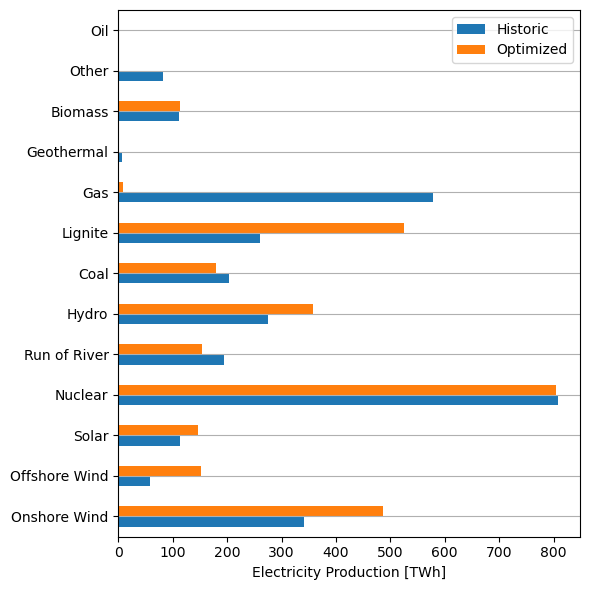

In [167]:
df_graph = combine_series_by_dictionary(historic.T.groupby(level=1).sum().sum(axis=1), pd.Series(electric_supply_from_the_sector_models(sector_network_with_a_15_carbon_price_and_gas_in_conventional2020)), matched_data_dictionary2 )
fig, ax = plt.subplots(figsize=(6, 6))
df_graph = df_graph / 1e6  # TWh
df_graph.plot.barh(ax=ax, xlabel="Electricity Production [TWh]", ylabel="")
ax.grid(axis="y")
#fig.savefig(snakemake.output.production_bar, bbox_inches="tight")
plt.show()

In [172]:
for i in network.carriers.index:
    print(i)

AC
DC
nuclear
geothermal
solar
hydro
offwind-dc
offwind-ac
onwind
offwind-float
solar-hsat
PHS
ror

lignite
coal
oil
uranium
gas
none
co2
co2 stored
co2 sequestered
H2
battery
urban central heat
urban central water tanks
urban central solar thermal
biogas
solid biomass
methanol
home battery
naphtha for industry
agriculture heat
shipping oil
agriculture electricity
industry methanol
gas for industry
kerosene for aviation
land transport oil
electricity
industry electricity
solid biomass for industry
low-temperature heat for industry
agriculture machinery oil
H2 for industry
process emissions
coal for industry
H2 Store
unsustainable biogas
unsustainable bioliquids
solar rooftop
urban central heat vent
oil primary
unsustainable solid biomass
H2 pipeline retrofitted
urban central air heat pump
H2 pipeline
DAC
H2 Electrolysis
urban central water tanks charger
urban central CHP CC
H2 Fuel Cell
urban central solid biomass CHP CC
CCGT
battery charger
urban central CHP
methanolisation
urban cent

### is all the gas for the electricity sector not in CCGT and OCGT carriers but instead in combined heat and power LINKS

In [ ]:
#is all the gas for the electricity 'urban central CHP CC'

In [176]:
gas_chp_carriers = ['urban central CHP CC', 'urban central CHP']

In [ ]:
matches = {}
carrier_to_find = ['urban central CHP CC']
n = network.copy()
for comp in n.components.keys():
    df = getattr(n, comp.lower())  # e.g., n.generators, n.links
    if "carrier" in df.columns:
        filtered = df[df["carrier"] == carrier_to_find]
        if not filtered.empty:
            matches[comp] = filtered.index

# Display results
for comp, df in matches.items():
    print(f"--- {comp} ---")
    print(df)

In [179]:
network.links[network.links.carrier.isin(gas_chp_carriers)].bus1.unique() #these CHP plant links are only going to the transmission level buses? 

array(['AT0 0', 'BA0 0', 'BE0 0', 'BG0 0', 'CH0 0', 'CZ0 0', 'DE0 0',
       'DK0 0', 'DK1 0', 'EE0 0', 'FI1 0', 'FR0 0', 'GB2 0', 'GB3 0',
       'GR0 0', 'HR0 0', 'HU0 0', 'IT0 0', 'IT4 0', 'LT0 0', 'LU0 0',
       'LV0 0', 'MK0 0', 'NL0 0', 'NO1 0', 'PL0 0', 'PT0 0', 'RO0 0',
       'RS0 0', 'SE1 0', 'SI0 0', 'SK0 0', 'XK0 0'], dtype=object)

In [194]:
chp_plants = network.links[network.links.carrier.isin(gas_chp_carriers)] #all seem to be built in 2020? 
chp_plants = chp_plants.index
chp_plant_disptach = network.links_t.p1[chp_plants] * -1 #multipled by -1 because power is being given to the transmission buses (which have MWh_el units )
chp_plant_disptach = chp_plant_disptach * network.snapshot_weightings.objective[0] #MW
chp_plant_disptach = chp_plant_disptach.sum()
chp_plant_disptach = chp_plant_disptach.sum()
chp_plant_disptach
#ok, so not the crazy increase I thought it would be, but I clearly missed something before, and I need to make sure all gas--> links are accounted for.  

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/1710597110.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



123.0632232074921

In [182]:
network.loads[network.loads.carrier == 'urban central heat'] #yeah the buses for the urban heat loads are [country] urban central heat 

bus             carrier type  \
Load                                                                          
AT0 0 urban central heat  AT0 0 urban central heat  urban central heat        
BA0 0 urban central heat  BA0 0 urban central heat  urban central heat        
BE0 0 urban central heat  BE0 0 urban central heat  urban central heat        
BG0 0 urban central heat  BG0 0 urban central heat  urban central heat        
CH0 0 urban central heat  CH0 0 urban central heat  urban central heat        
CZ0 0 urban central heat  CZ0 0 urban central heat  urban central heat        
DE0 0 urban central heat  DE0 0 urban central heat  urban central heat        
DK0 0 urban central heat  DK0 0 urban central heat  urban central heat        
DK1 0 urban central heat  DK1 0 urban central heat  urban central heat        
EE0 0 urban central heat  EE0 0 urban central heat  urban central heat        
FI1 0 urban central heat  FI1 0 urban central heat  urban central heat        
FR0 0 urban central heat  FR0 0 urban central heat  urban central heat        
GB2 0 urban central heat  GB2 0 urban central heat  urban central heat        
GB3 0 urban central heat  GB3 0 urban central heat  urban central heat        
GR0 0 urban central heat  GR0 0 urban central heat  urban central heat        
HR0 0 urban central heat  HR0 0 urban central heat  urban central heat        
HU0 0 urban central heat  HU0 0 urban central heat  urban central heat        
IT0 0 urban central heat  IT0 0 urban central heat  urban central heat        
IT4 0 urban central heat  IT4 0 urban central heat  urban central heat        
LT0 0 urban central heat  LT0 0 urban central heat  urban central heat        
LU0 0 urban central heat  LU0 0 urban central heat  urban central heat        
LV0 0 urban central heat  LV0 0 urban central heat  urban central heat        
MK0 0 urban central heat  MK0 0 urban central heat  urban central heat        
NL0 0 urban central heat  NL0 0 urban central heat  urban central heat        
NO1 0 urban central heat  NO1 0 urban central heat  urban central heat        
PL0 0 urban central heat  PL0 0 urban central heat  urban central heat        
PT0 0 urban central heat  PT0 0 urban central heat  urban central heat        
RO0 0 urban central heat  RO0 0 urban central heat  urban central heat        
RS0 0 urban central heat  RS0 0 urban central heat  urban central heat        
SE1 0 urban central heat  SE1 0 urban central heat  urban central heat        
SI0 0 urban central heat  SI0 0 urban central heat  urban central heat        
SK0 0 urban central heat  SK0 0 urban central heat  urban central heat        
XK0 0 urban central heat  XK0 0 urban central heat  urban central heat        

                          p_set  q_set  sign  active  
Load                                                  
AT0 0 urban central heat    0.0    0.0  -1.0    True  
BA0 0 urban central heat    0.0    0.0  -1.0    True  
BE0 0 urban central heat    0.0    0.0  -1.0    True  
BG0 0 urban central heat    0.0    0.0  -1.0    True  
CH0 0 urban central heat    0.0    0.0  -1.0    True  
CZ0 0 urban central heat    0.0    0.0  -1.0    True  
DE0 0 urban central heat    0.0    0.0  -1.0    True  
DK0 0 urban central heat    0.0    0.0  -1.0    True  
DK1 0 urban central heat    0.0    0.0  -1.0    True  
EE0 0 urban central heat    0.0    0.0  -1.0    True  
FI1 0 urban central heat    0.0    0.0  -1.0    True  
FR0 0 urban central heat    0.0    0.0  -1.0    True  
GB2 0 urban central heat    0.0    0.0  -1.0    True  
GB3 0 urban central heat    0.0    0.0  -1.0    True  
GR0 0 urban central heat    0.0    0.0  -1.0    True  
HR0 0 urban central heat    0.0    0.0  -1.0    True  
HU0 0 urban central heat    0.0    0.0  -1.0    True  
IT0 0 urban central heat    0.0    0.0  -1.0    True  
IT4 0 urban central heat    0.0    0.0  -1.0    True  
LT0 0 urban central heat    0.0    0.0  -1.0    True  
LU0 0 urban central heat    0.0    0.0  -1.0    True  
LV0 0 urban cent

In [198]:
network.buses.index

Index(['AL0 0', 'AT0 0', 'BA0 0', 'BE0 0', 'BG0 0', 'CH0 0', 'CZ0 0', 'DE0 0',
       'DK0 0', 'DK1 0',
       ...
       'SI0 0 urban decentral heat', 'SI0 0 urban decentral water tanks',
       'SK0 0 rural heat', 'SK0 0 rural water tanks',
       'SK0 0 urban decentral heat', 'SK0 0 urban decentral water tanks',
       'XK0 0 rural heat', 'XK0 0 rural water tanks',
       'XK0 0 urban decentral heat', 'XK0 0 urban decentral water tanks'],
      dtype='object', name='Bus', length=859)

In [210]:
#returns gas and gas for industry buses indicies
gas_buses = [i for i in network.buses.index if ' gas' in i.lower()]
gas_buses
network.buses.loc[gas_buses]

v_nom type          x          y           carrier  \
Bus                                                                          
AL0 0 gas                 1.0       19.845426  41.518089               gas   
AT0 0 gas                 1.0       14.281561  47.640213               gas   
BA0 0 gas                 1.0       18.047126  43.879730               gas   
BE0 0 gas                 1.0        4.888784  50.729762               gas   
BG0 0 gas                 1.0       24.656324  42.922999               gas   
...                       ...  ...        ...        ...               ...   
RS0 0 gas for industry    1.0       20.653802  44.476645  gas for industry   
SE1 0 gas for industry    1.0       16.082650  60.638979  gas for industry   
SI0 0 gas for industry    1.0       15.043369  46.170477  gas for industry   
SK0 0 gas for industry    1.0       19.227945  48.601176  gas for industry   
XK0 0 gas for industry    1.0       20.970732  42.590911  gas for industry   

                           unit  v_mag_pu_set  v_mag_pu_min  v_mag_pu_max  \
Bus                                                                         
AL0 0 gas               MWh_LHV           1.0           0.0           inf   
AT0 0 gas               MWh_LHV           1.0           0.0           inf   
BA0 0 gas               MWh_LHV           1.0           0.0           inf   
BE0 0 gas               MWh_LHV           1.0           0.0           inf   
BG0 0 gas               MWh_LHV           1.0           0.0           inf   
...                         ...           ...           ...           ...   
RS0 0 gas for industry  MWh_LHV           1.0           0.0           inf   
SE1 0 gas for industry  MWh_LHV           1.0           0.0           inf   
SI0 0 gas for industry  MWh_LHV           1.0           0.0           inf   
SK0 0 gas for industry  MWh_LHV           1.0           0.0           inf   
XK0 0 gas for industry  MWh_LHV           1.0           0.0           inf   

                       control generator sub_network  substation_lv  \
Bus                                                                   
AL0 0 gas                   PQ                                  NaN   
AT0 0 gas                   PQ                                  NaN   
BA0 0 gas                   PQ                                  NaN   
BE0 0 gas                   PQ                                  NaN   
BG0 0 gas                   PQ                                  NaN   
...                        ...       ...         ...            ...   
RS0 0 gas for industry      PQ                                  NaN   
SE1 0 gas for industry      PQ                                  NaN   
SI0 0 gas for industry      PQ                                  NaN   
SK0 0 gas for industry      PQ                                  NaN   
XK0 0 gas for industry      PQ                                  NaN   

                        substation_off location country  
Bus                                                      
AL0 0 gas                          NaN    AL0 0      AL  
AT0 0 gas                          NaN    AT0 0      AT  
BA0 0 gas                          NaN    BA0 0      BA  
BE0 0 gas                          NaN    BE0 0      BE  
BG0 0 gas                          NaN    BG0 0      BG  
...                                ...      ...     ...  
RS0 0 gas for industry             NaN    RS0 0      RS  
SE1 0 gas for industry             NaN    SE1 0      SE  
SI0 0 gas for industry             NaN    SI0 0      SI  
SK0 0 gas for industry             NaN    SK0 0      SK  
XK0 0 gas for industry             NaN    XK0 0      XK  

[78 rows x 16 columns]

In [205]:
bus_connections(network, 'BG0 0 gas for industry')

The loads connected to this bus are:     ['BG0 0 gas for industry']
The incoming links to this bus are from the bus:  ['BG0 0 gas' 'BG0 0 gas']
The incoming links are:  Index(['BG0 0 gas for industry', 'BG0 0 gas for industry CC-2020'], dtype='object', name='Link')


In [207]:
#returns just gas buses 
gas_buses = network.buses[network.buses.carrier == 'gas']
gas_buses


v_nom type          x          y carrier     unit  v_mag_pu_set  \
Bus                                                                          
AL0 0 gas    1.0       19.845426  41.518089     gas  MWh_LHV           1.0   
AT0 0 gas    1.0       14.281561  47.640213     gas  MWh_LHV           1.0   
BA0 0 gas    1.0       18.047126  43.879730     gas  MWh_LHV           1.0   
BE0 0 gas    1.0        4.888784  50.729762     gas  MWh_LHV           1.0   
BG0 0 gas    1.0       24.656324  42.922999     gas  MWh_LHV           1.0   
CH0 0 gas    1.0        8.261672  46.826635     gas  MWh_LHV           1.0   
CZ0 0 gas    1.0       15.237140  49.865927     gas  MWh_LHV           1.0   
DE0 0 gas    1.0        9.203934  51.117369     gas  MWh_LHV           1.0   
DK0 0 gas    1.0        9.727929  56.142471     gas  MWh_LHV           1.0   
DK1 0 gas    1.0       12.303316  55.515974     gas  MWh_LHV           1.0   
EE0 0 gas    1.0       25.636484  58.887368     gas  MWh_LHV           1.0   
ES0 0 gas    1.0       -3.384744  40.676192     gas  MWh_LHV           1.0   
ES6 0 gas    1.0        2.704258  39.609088     gas  MWh_LHV           1.0   
FI1 0 gas    1.0       24.702717  62.593593     gas  MWh_LHV           1.0   
FR0 0 gas    1.0        3.155454  47.064780     gas  MWh_LHV           1.0   
FR5 0 gas    1.0        9.449985  42.528486     gas  MWh_LHV           1.0   
GB2 0 gas    1.0       -1.970192  53.392616     gas  MWh_LHV           1.0   
GB3 0 gas    1.0       -6.166763  54.640156     gas  MWh_LHV           1.0   
GR0 0 gas    1.0       22.849930  38.909207     gas  MWh_LHV           1.0   
HR0 0 gas    1.0       16.284188  44.808115     gas  MWh_LHV           1.0   
HU0 0 gas    1.0       19.288262  47.338342     gas  MWh_LHV           1.0   
IE3 0 gas    1.0       -7.597724  52.882553     gas  MWh_LHV           1.0   
IT0 0 gas    1.0       11.631725  43.623754     gas  MWh_LHV           1.0   
IT4 0 gas    1.0        8.739825  40.032890     gas  MWh_LHV           1.0   
LT0 0 gas    1.0       23.426630  55.296841     gas  MWh_LHV           1.0   
LU0 0 gas    1.0        6.056384  49.684566     gas  MWh_LHV           1.0   
LV0 0 gas    1.0       24.074836  56.828886     gas  MWh_LHV           1.0   
ME0 0 gas    1.0       19.085316  42.787227     gas  MWh_LHV           1.0   
MK0 0 gas    1.0       21.596582  41.675125     gas  MWh_LHV           1.0   
NL0 0 gas    1.0        5.332808  52.311531     gas  MWh_LHV           1.0   
NO1 0 gas    1.0        9.219401  61.729906     gas  MWh_LHV           1.0   
PL0 0 gas    1.0       19.060401  51.660174     gas  MWh_LHV           1.0   
PT0 0 gas    1.0       -8.248102  40.187334     gas  MWh_LHV           1.0   
RO0 0 gas    1.0       25.052874  45.557457     gas  MWh_LHV           1.0   
RS0 0 gas    1.0       20.653802  44.476645     gas  MWh_LHV           1.0   
SE1 0 gas    1.0       16.082650  60.638979     gas  MWh_LHV           1.0   
SI0 0 gas    1.0       15.043369  46.170477     gas  MWh_LHV           1.0   
SK0 0 gas    1.0       19.227945  48.601176     gas  MWh_LHV           1.0   
XK0 0 gas    1.0       20.970732  42.590911     gas  MWh_LHV           1.0   

           v_mag_pu_min  v_mag_pu_max control generator sub_network  \
Bus                                                                   
AL0 0 gas           0.0           inf      PQ                         
AT0 0 gas           0.0           inf      PQ                         
BA0 0 gas           0.0           inf      PQ                         
BE0 0 gas           0.0           inf      PQ                         
BG0 0 gas           0.0           inf      PQ                         
CH0 0 gas           0.0           inf      PQ                         
CZ0 0 gas           0.0           inf      PQ                         
DE0 0 gas           0.0           inf      PQ                         
DK0 0 gas           0.0           inf      PQ                         
DK1 0 gas           0.0        

In [216]:
#all electric buses 
electric_buses = network.buses[network.buses.unit == 'MWh_el']
#just AC buses 
#electric_buses = network.buses[network.buses.carrier == 'AC']
electric_buses

v_nom type          x          y       carrier    unit  \
Bus                                                                          
AL0 0               380.0       19.845426  41.518089            AC  MWh_el   
AT0 0               380.0       14.281561  47.640213            AC  MWh_el   
BA0 0               380.0       18.047126  43.879730            AC  MWh_el   
BE0 0               380.0        4.888784  50.729762            AC  MWh_el   
BG0 0               380.0       24.656324  42.922999            AC  MWh_el   
...                   ...  ...        ...        ...           ...     ...   
RS0 0 home battery    1.0       20.653802  44.476645  home battery  MWh_el   
SE1 0 home battery    1.0       16.082650  60.638979  home battery  MWh_el   
SI0 0 home battery    1.0       15.043369  46.170477  home battery  MWh_el   
SK0 0 home battery    1.0       19.227945  48.601176  home battery  MWh_el   
XK0 0 home battery    1.0       20.970732  42.590911  home battery  MWh_el   

                    v_mag_pu_set  v_mag_pu_min  v_mag_pu_max control  \
Bus                                                                    
AL0 0                        1.0           0.0           inf      PQ   
AT0 0                        1.0           0.0           inf      PQ   
BA0 0                        1.0           0.0           inf      PQ   
BE0 0                        1.0           0.0           inf   Slack   
BG0 0                        1.0           0.0           inf      PQ   
...                          ...           ...           ...     ...   
RS0 0 home battery           1.0           0.0           inf      PQ   
SE1 0 home battery           1.0           0.0           inf      PQ   
SI0 0 home battery           1.0           0.0           inf      PQ   
SK0 0 home battery           1.0           0.0           inf      PQ   
XK0 0 home battery           1.0           0.0           inf      PQ   

                        generator sub_network  substation_lv  substation_off  \
Bus                                                                            
AL0 0                                                    1.0             1.0   
AT0 0                                                    1.0             1.0   
BA0 0                                                    1.0             1.0   
BE0 0               BE0 0 nuclear                        1.0             1.0   
BG0 0                                                    1.0             1.0   
...                           ...         ...            ...             ...   
RS0 0 home battery                                       NaN             NaN   
SE1 0 home battery                                       NaN             NaN   
SI0 0 home battery                                       NaN             NaN   
SK0 0 home battery                                       NaN             NaN   
XK0 0 home battery                                       NaN             NaN   

                   location country  
Bus                                  
AL0 0                 AL0 0      AL  
AT0 0                 AT0 0      AT  
BA0 0                 BA0 0      BA  
BE0 0                 BE0 0      BE  
BG0 0                 BG0 0      BG  
...                     ...     ...  
RS0 0 home battery    RS0 0      RS  
SE1 0 home battery    SE1 0      SE  
SI0 0 home battery    SI0 0      SI  
SK0 0 home battery    SK0 0      SK  
XK0 0 home battery    XK0 0      XK  

[156 rows x 16 columns]

In [226]:
#all links from a gas bus (all types of gas) to an electric bus (all types of electric)
all_gas_to_electric_links = network.links[network.links.bus0.isin(gas_buses)][network.links.bus1.isin(electric_buses.index)]
all_gas_to_electric_links = all_gas_to_electric_links.index #going into 2027 again (don't like that, start running with only up to 2020 I think -- those plants can't even be completed yet)
all_links_dispatch = network.links_t.p1[all_gas_to_electric_links] * -1 * network.snapshot_weightings.objective[0]
all_links_dispatch = all_links_dispatch.sum().sum()
all_links_dispatch
#still on the order of 10^6

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/44339489.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/44339489.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



9464889.946256513

In [228]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/BAU validation/emission_price_15_and_gas_in_existing_capacities/networks/base_s_39___2020.nc')

INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [229]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional.statistics().loc['Link'].loc['Combined-Cycle Gas']

Optimal Capacity           3.731393e+05
Installed Capacity         3.721534e+05
Supply                     1.281115e+07
Withdrawal                 1.690126e+07
Energy Balance            -4.090104e+06
Transmission               0.000000e+00
Capacity Factor            5.170636e-03
Curtailment                0.000000e+00
Capital Expenditure        2.317662e+10
Operational Expenditure    4.422550e+07
Revenue                    4.421873e+07
Market Value               3.451581e+00
Name: Combined-Cycle Gas, dtype: float64

In [235]:
gas_buses = sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses[sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses.carrier == 'gas'].index
electric_buses = sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses[sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses.carrier == 'AC'].index

all_gas_to_electric_links = sector_network_with_a_15_carbon_price_and_gas_in_conventional.links[sector_network_with_a_15_carbon_price_and_gas_in_conventional.links.bus0.isin(gas_buses)][sector_network_with_a_15_carbon_price_and_gas_in_conventional.links.bus1.isin(electric_buses)]
all_gas_to_electric_links = all_gas_to_electric_links.index #going into 2027 again (don't like that, start running with only up to 2020 I think -- those plants can't even be completed yet)
all_links_dispatch = sector_network_with_a_15_carbon_price_and_gas_in_conventional.links_t.p0[all_gas_to_electric_links] * -1 * sector_network_with_a_15_carbon_price_and_gas_in_conventional.snapshot_weightings.objective[0]
all_links_dispatch = all_links_dispatch.sum().sum()
all_links_dispatch


/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/4008945141.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_55468/4008945141.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



-16901730.034583025

#SOMETHING IS WRONG, FOR THE EXACT SAME NETWORK THE SUM OF THE DISPATCH AND THE SUPPLY GIVEN IN STATISTICS ARE NOT THE SAME
#but the withdrawl is the same.... why 


In [232]:
sector_network_with_a_15_carbon_price_and_gas_in_conventional.statistics().loc['Link'] #I must be missing something... 

Optimal Capacity  Installed Capacity  \
Combined-Cycle Gas                        373139.25175        372153.35983   
DAC                                            0.00451             0.00000   
DC                                        122949.77374         54040.00000   
Fischer-Tropsch                                0.04925             0.00000   
H2 Electrolysis                                0.01926             0.00000   
...                                                ...                 ...   
urban central solid biomass CHP            62999.82173         43593.08657   
urban central solid biomass CHP CC             0.01765             0.00000   
urban central water tanks charger          22152.04020             0.00000   
urban central water tanks discharger       28315.02002             0.00000   
urban decentral oil boiler                278882.91366        278882.91366   

                                            Supply    Withdrawal  \
Combined-Cycle Gas                    1.281115e+07  1.690126e+07   
DAC                                   3.190467e+01  9.411878e+01   
DC                                    3.141698e+08  3.244930e+08   
Fischer-Tropsch                       2.631008e+02  3.815742e+02   
H2 Electrolysis                       4.684364e+01  7.393633e+01   
...                                            ...           ...   
urban central solid biomass CHP       4.592088e+08  4.205049e+08   
urban central solid biomass CHP CC    1.300083e+02  1.255957e+02   
urban central water tanks charger     1.464518e+07  1.627242e+07   
urban central water tanks discharger  1.310688e+07  1.456320e+07   
urban decentral oil boiler            2.879957e+07  3.182725e+07   

                                      Energy Balance  Transmission  \
Combined-Cycle Gas                     -4.090104e+06  0.000000e+00   
DAC                                    -6.221411e+01  0.000000e+00   
DC                                     -1.032321e+07  3.244930e+08   
Fischer-Tropsch                        -1.184733e+02  0.000000e+00   
H2 Electrolysis                        -2.709269e+01  0.000000e+00   
...                                              ...           ...   
urban central solid biomass CHP         3.870383e+07  0.000000e+00   
urban central solid biomass CHP CC      4.412650e+00  0.000000e+00   
urban central water tanks charger      -1.627242e+06  0.000000e+00   
urban central water tanks discharger   -1.456320e+06  0.000000e+00   
urban decentral oil boiler             -3.027673e+06  0.000000e+00   

                                      Capacity Factor  Curtailment  \
Combined-Cycle Gas                           0.005171          0.0   
DAC                                          0.443459          0.0   
DC                                           0.301282          0.0   
Fischer-Tropsch                              0.733807          0.0   
H2 Electrolysis                              0.438214          0.0   
...                                               ...          ...   
urban central solid biomass CHP              0.761952          0.0   
urban central solid biomass CHP CC           0.610765          0.0   
urban central water tanks charger            0.083856          0.0   
urban central water tanks discharger         0.058713          0.0   
urban decentral oil boiler                   0.013028          0.0   

                                      Capital Expenditure  \
Combined-Cycle Gas                           2.317662e+10   
DAC                                          8.260017e+03   
DC                                           3.238081e+09   
Fischer-Tropsch                              4.009815e+03   
H2 Electrolysis                              4.846898e+03   
...                                                   ...   
urban central solid biomass CHP              7.265961e+09   
urban central solid biomass CHP CC           5.612934e+03   
urban central water tanks charger            0.000000

In [236]:
network.links.carrier.unique()

array(['DC', 'oil refining', 'co2 sequestered', 'OCGT', 'lignite', 'coal',
       'CCGT', 'H2 Electrolysis', 'H2 Fuel Cell', 'gas pipeline',
       'gas pipeline new', 'H2 pipeline retrofitted', 'H2 pipeline',
       'battery charger', 'battery discharger', 'Sabatier', 'SMR CC',
       'SMR', 'land transport oil', 'urban central air heat pump',
       'urban central water tanks charger',
       'urban central water tanks discharger',
       'urban central resistive heater', 'urban central gas boiler',
       'urban central CHP', 'urban central CHP CC',
       'unsustainable bioliquids', 'biogas to gas',
       'urban central solid biomass CHP',
       'urban central solid biomass CHP CC', 'solid biomass to hydrogen',
       'solid biomass for industry', 'solid biomass for industry CC',
       'gas for industry', 'gas for industry CC', 'industry methanol',
       'methanolisation', 'shipping oil', 'Fischer-Tropsch',
       'naphtha for industry', 'kerosene for aviation',
       'process

In [238]:
def calculate_supply(n, label, supply):
    """
    Calculate the max dispatch of each component at the buses aggregated by
    carrier.
    """
    bus_carriers = n.buses.carrier.unique()

    for i in bus_carriers:
        bus_map = n.buses.carrier == i
        bus_map.at[""] = False

        for c in n.iterate_components(n.one_port_components):
            items = c.df.index[c.df.bus.map(bus_map).fillna(False)]

            if len(items) == 0:
                continue

            s = (
                c.pnl.p[items]
                .max()
                .multiply(c.df.loc[items, "sign"])
                .groupby(c.df.loc[items, "carrier"])
                .sum()
            )
            s = pd.concat([s], keys=[c.list_name])
            s = pd.concat([s], keys=[i])

            supply = supply.reindex(s.index.union(supply.index))
            supply.loc[s.index, label] = s

        for c in n.iterate_components(n.branch_components):
            for end in [col[3:] for col in c.df.columns if col[:3] == "bus"]:
                items = c.df.index[c.df["bus" + end].map(bus_map).fillna(False)]

                if len(items) == 0 or c.pnl["p" + end].empty:
                    continue

                # lots of sign compensation for direction and to do maximums
                s = (-1) ** (1 - int(end)) * (
                    (-1) ** int(end) * c.pnl["p" + end][items]
                ).max().groupby(c.df.loc[items, "carrier"]).sum()
                s.index = s.index + end
                s = pd.concat([s], keys=[c.list_name])
                s = pd.concat([s], keys=[i])

                supply = supply.reindex(s.index.union(supply.index))
                supply.loc[s.index, label] = s

    return supply

In [280]:
n = sector_network_with_a_15_carbon_price_and_gas_in_conventional2020
n.buses.carrier.unique()
bus_carriers = n.buses.carrier.unique()
for i in bus_carriers:
    bus_map = n.buses.carrier == i
    bus_map.at[""] = False
    for c in n.iterate_components(n.one_port_components):
        items = c.df.index[c.df.bus.map(bus_map).fillna(False)]
        if len(items) == 0:
            continue

        s = (
            c.pnl.p[items]
            .max()
            .multiply(c.df.loc[items, "sign"])
            .groupby(c.df.loc[items, "carrier"])
            .sum()
        )
        s = pd.concat([s], keys=[c.list_name])
        s = pd.concat([s], keys=[i])
c.pnl.p[items].max().multiply(c.df.loc[items, "sign"]).groupby(c.df.loc[items, "carrier"]).sum() #k this is max power of the whole system components at any one time
s = pd.concat([s], keys=[c.list_name])
s = pd.concat([s], keys=[i])
s

                                                                          carrier                    
urban decentral water tanks  stores  urban decentral water tanks  stores  urban decentral water tanks    0.027264
dtype: float64

In [285]:
supply = pd.DataFrame()
label = 'network'
supply = supply.reindex(s.index.union(supply.index))
supply.loc[s.index, label] = s
supply

network
urban decentral water tanks stores urban decentral water tanks stores urban decentral water tanks  0.027264

In [288]:
for c in n.iterate_components(n.branch_components):
    for end in [col[3:] for col in c.df.columns if col[:3] == "bus"]:
        items = c.df.index[c.df["bus" + end].map(bus_map).fillna(False)]


        if len(items) == 0 or c.pnl["p" + end].empty:
            continue

        # lots of sign compensation for direction and to do maximums
        s = (-1) ** (1 - int(end)) * (
            (-1) ** int(end) * c.pnl["p" + end][items]
            ).max().groupby(c.df.loc[items, "carrier"]).sum()
        s.index = s.index + end
        s = pd.concat([s], keys=[c.list_name])
        s = pd.concat([s], keys=[i])

        supply = supply.reindex(s.index.union(supply.index))
        supply.loc[s.index, label] = s

AssertionError: Length of new_levels (5) must be <= self.nlevels (3)

In [243]:
outputs = [
        "nodal_costs",
        "nodal_capacities",
        "nodal_cfs",
        "cfs",
        "costs",
        "capacities",
        "curtailment",
        "energy",
        "supply",
        "supply_energy",
        "nodal_supply_energy",
        "prices",
        "weighted_prices",
        "price_statistics",
        "market_values",
        "metrics",
    ]
columns = ["cluster", "opt", "planning_horizon"]
df = {output: pd.DataFrame(columns=columns, dtype=float) for output in outputs}
df

{'nodal_costs': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'nodal_capacities': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'nodal_cfs': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'cfs': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'costs': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'capacities': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'curtailment': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'energy': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'supply': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'supply_energy': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'nodal_supply_energy': Empty DataFrame
 Columns: [cluster, opt, planning_horizon]
 Index: [],
 'prices': Empty DataFrame
 Columns: [cluster, opt, pla

In [297]:
network_choice = sector_network_with_a_15_carbon_price_and_gas_in_conventional
gas_all_buses = network_choice.buses[network_choice.buses.carrier.isin(['gas', 'gas for industry'])]
electric_all_buses = sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses[sector_network_with_a_15_carbon_price_and_gas_in_conventional.buses.unit == 'MWh_el']

In [ ]:
links = network_choice.links[network_choice.links.bus0 ]

array(['gas', 'H2', 'biogas', 'solid biomass', 'unsustainable bioliquids',
       'solid biomass for industry', 'gas for industry',
       'industry methanol', 'shipping oil', 'naphtha for industry',
       'kerosene for aviation', 'coal for industry',
       'agriculture machinery oil'], dtype=object)